<a href="https://colab.research.google.com/github/supulkalhara/Data_Science/blob/main/Preprocessing_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [ ]:
# Plots
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.tools as tls
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)
#ignore warning messages 
import warnings
warnings.filterwarnings('ignore') 


In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [ ]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "diabetes.csv" with length 26867 bytes


In [ ]:
import io

In [ ]:
df = pd.read_csv(io.StringIO(uploaded['diabetes.csv'].decode('utf-8')))

In [ ]:
df.head(20)

,Patient_ID,Pregncies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,2,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,3,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,4,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,5,-1.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1
5,6,5.0,116.0,74.0,0.0,0.0,25.6,0.201,NaN,0
6,7,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26.0,1
7,8,10.0,115.0,0.0,0.0,0.0,35.3,0.134,29.0,0
8,9,2.0,197.0,70.0,45.0,543.0,30.5,0.158,53.0,1
9,10,8.0,125.0,96.0,0.0,0.0,0.0,0.232,54.0,1


# Drop unwanted columns

In [ ]:
df = df.drop(['Patient_ID'] , axis=1)
df

,Pregncies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,-1.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1
...,...,...,...,...,...,...,...,...,...
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1
767,1.0,93.0,70.0,31.0,0.0,30.4,0.315,23.0,0
768,1.0,189.0,60.0,23.0,846.0,30.1,0.398,59.0,1


# Handle Duplicates

In [ ]:
df.duplicated().sum()

2

In [ ]:
df = df.drop_duplicates()
df

,Pregncies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,-1.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1


In [ ]:
df.duplicated().sum()

0

# Analyse data set

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregncies                 766 non-null    float64
 1   Glucose                   766 non-null    float64
 2   BloodPressure             764 non-null    float64
 3   SkinThickness             764 non-null    float64
 4   Insulin                   765 non-null    float64
 5   BMI                       766 non-null    float64
 6   DiabetesPedigreeFunction  765 non-null    float64
 7   Age                       764 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 60.0 KB


In [ ]:
columns = df.columns
columns = columns[:8]
columns

Index(['Pregncies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [ ]:
for i in columns:
  count = (df[i] == 0).sum()
  print(i + " " + str(count))

Pregncies 110
Glucose 5
BloodPressure 35
SkinThickness 227
Insulin 372
BMI 11
DiabetesPedigreeFunction 0
Age 0


In [ ]:
for i in columns:
  count = (df[i] < 0).sum()
  print(i + " " + str(count))

Pregncies 2
Glucose 1
BloodPressure 1
SkinThickness 0
Insulin 0
BMI 0
DiabetesPedigreeFunction 0
Age 0


In [ ]:
df.isna().sum()

Pregncies                   2
Glucose                     2
BloodPressure               4
SkinThickness               4
Insulin                     3
BMI                         2
DiabetesPedigreeFunction    3
Age                         4
Outcome                     0
dtype: int64

Here zero values and minus values of each columns doesn't give valid idea. So we can consider those zero values and minus values as missing values.

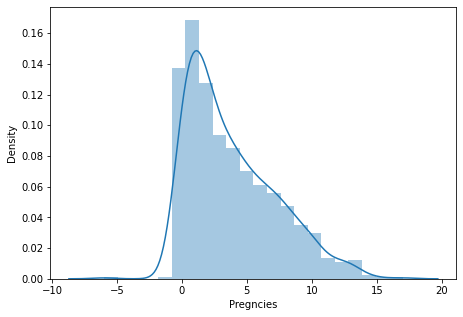

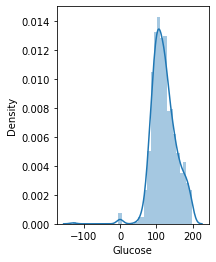

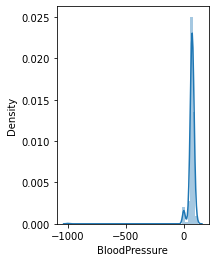

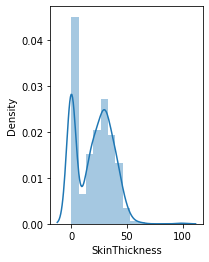

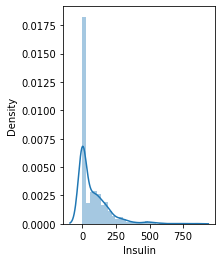

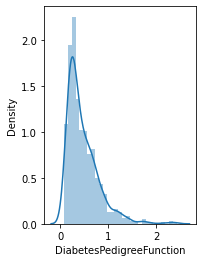

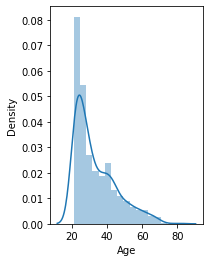

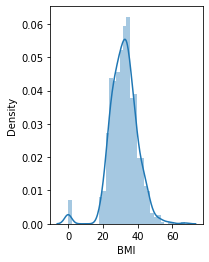

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['Pregncies'])
plt.show()
plt.subplot(1,2,2)
sns.distplot(df['Glucose'])
plt.show()
plt.subplot(1,2,2)
sns.distplot(df['BloodPressure'])
plt.show()
plt.subplot(1,2,2)
sns.distplot(df['SkinThickness'])
plt.show()
plt.subplot(1,2,2)
sns.distplot(df['Insulin'])
plt.show()
plt.subplot(1,2,2)
sns.distplot(df['DiabetesPedigreeFunction'])
plt.show()
plt.subplot(1,2,2)
sns.distplot(df['Age'])
plt.show()
plt.subplot(1,2,2)
sns.distplot(df['BMI'])
plt.show()

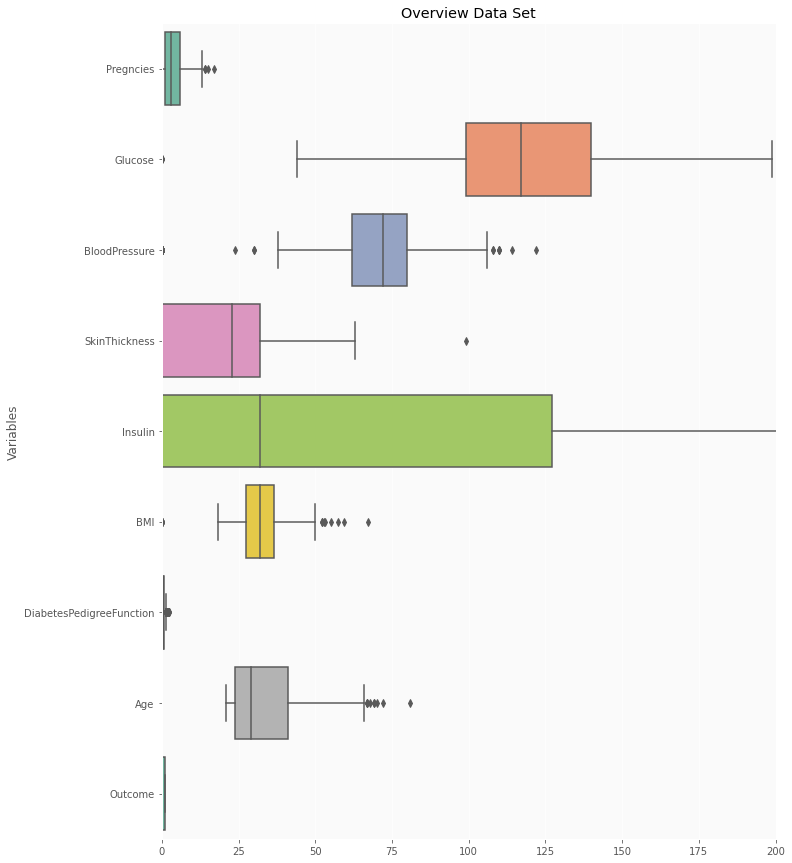

In [ ]:
plt.style.use('ggplot') # Using ggplot2 style visuals 

f, ax = plt.subplots(figsize=(11, 15))

ax.set_facecolor('#fafafa')
ax.set(xlim=(-.05, 200))
plt.ylabel('Variables')
plt.title("Overview Data Set")
ax = sns.boxplot(data = df, 
  orient = 'h', 
  palette = 'Set2')


# Handle Invalid Data

In [ ]:
for i in columns:
  for c in range(df[i].size):
    if(df[i][c]<=0): df[i][c] = np.NaN

In [ ]:
for i in columns:
  count = (df[i] <= 0).sum()
  print(i + " " + str(count))

Pregncies 0
Glucose 0
BloodPressure 0
SkinThickness 0
Insulin 0
BMI 0
DiabetesPedigreeFunction 0
Age 0


In [ ]:
df.isna().sum()

Pregncies                   114
Glucose                       8
BloodPressure                40
SkinThickness               231
Insulin                     375
BMI                          13
DiabetesPedigreeFunction      3
Age                           4
Outcome                       0
dtype: int64

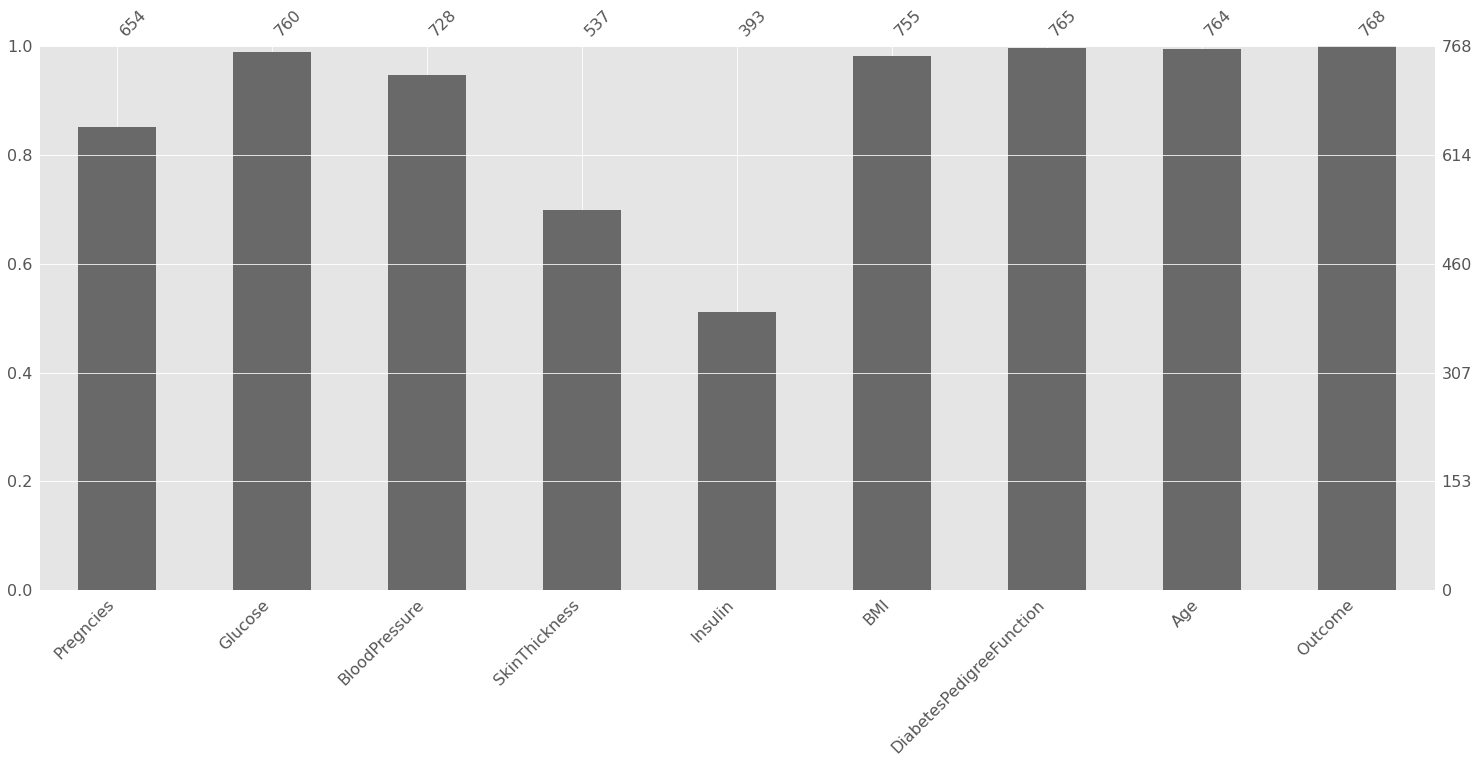

In [ ]:
msno.bar(df)

# Handle Missing Values

In [ ]:
df # use for do analyse by imputing mean by grouping of Outcome
df1 = df.copy() # use for do analyse by imputing median by grouping Outcome
df2 = df.copy() # use for do analyse by imputing median without grouping
df3 = df.copy() # user for do analyse by imputing using KNN and median

## **Imput mean value for missing values**

In [ ]:
def isNaN(num):
    if float('-inf') < float(num) < float('inf'):
        return False 
    else:
        return True

In [ ]:
for i in columns:
  mean_0 = df[(df['Outcome'] == 0 )][i].mean()
  mean_1 = df[(df['Outcome'] == 1 )][i].mean()
  print(mean_0 , mean_1)
  for c in range(df[i].size):
    if(isNaN(df[i][c])):
      if(df['Outcome'][c]==0): df[i][c] = mean_0
      else: df[i][c] = mean_1
  

3.8618266978922717 5.687224669603524
110.47070707070706 142.3698113207547
70.83193277310924 75.32142857142857
27.252100840336134 33.0
130.2509505703422 206.84615384615384
30.872244897959142 35.41660377358485
0.4292084168336675 0.5523796992481202
31.183098591549296 37.07865168539326


In [ ]:
df.isnull().sum()

Pregncies                   0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

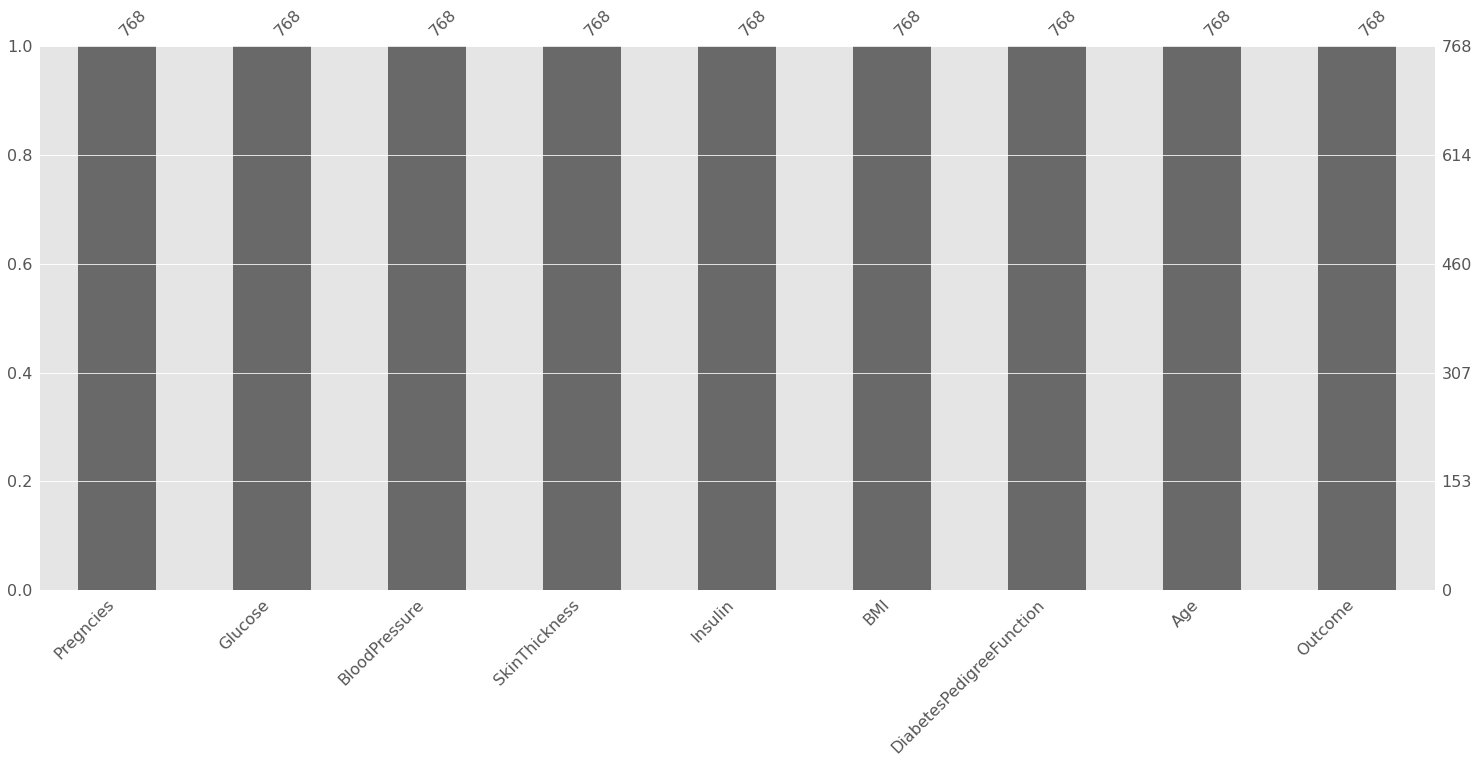

In [ ]:
msno.bar(df)

## Vitualize Data Set

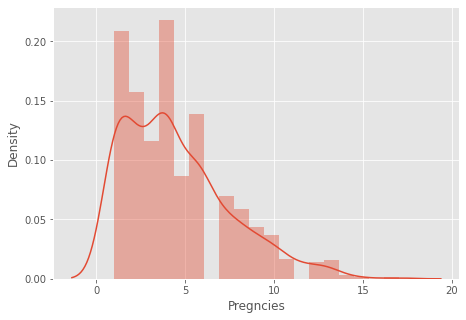

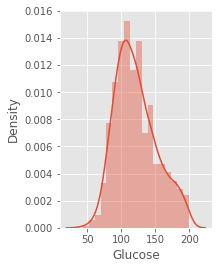

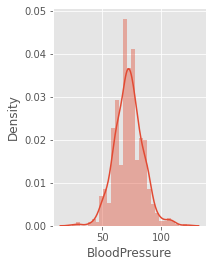

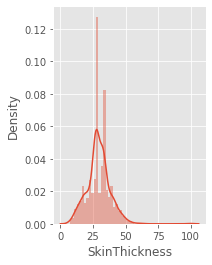

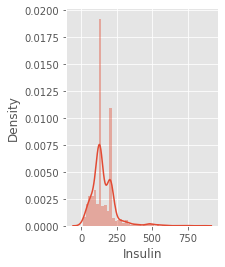

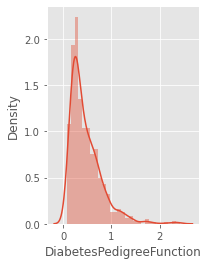

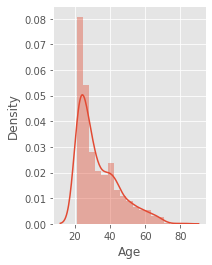

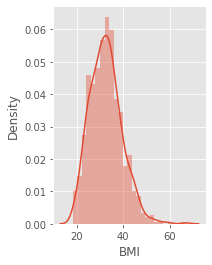

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['Pregncies'])
plt.show()
plt.subplot(1,2,2)
sns.distplot(df['Glucose'])
plt.show()
plt.subplot(1,2,2)
sns.distplot(df['BloodPressure'])
plt.show()
plt.subplot(1,2,2)
sns.distplot(df['SkinThickness'])
plt.show()
plt.subplot(1,2,2)
sns.distplot(df['Insulin'])
plt.show()
plt.subplot(1,2,2)
sns.distplot(df['DiabetesPedigreeFunction'])
plt.show()
plt.subplot(1,2,2)
sns.distplot(df['Age'])
plt.show()
plt.subplot(1,2,2)
sns.distplot(df['BMI'])
plt.show()

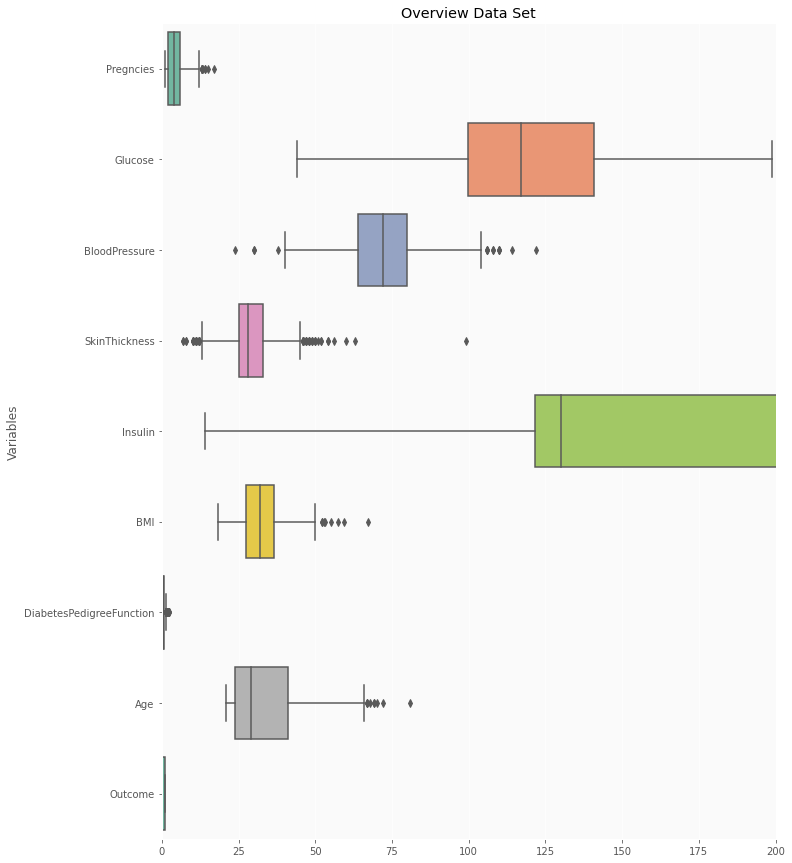

In [ ]:
plt.style.use('ggplot') # Using ggplot2 style visuals 

f, ax = plt.subplots(figsize=(11, 15))

ax.set_facecolor('#fafafa')
ax.set(xlim=(-.05, 200))
plt.ylabel('Variables')
plt.title("Overview Data Set")
ax = sns.boxplot(data = df, 
  orient = 'h', 
  palette = 'Set2')

## **Imput median value for missing values (**by grouping**)**

In [ ]:
for i in columns:
  median_0 = df1[(df1['Outcome'] == 0 )][i].median()
  median_1 = df1[(df1['Outcome'] == 1 )][i].median()
  print(median_0 , median_1)
  for c in range(df1[i].size):
    if(isNaN(df1[i][c])):
      if(df1['Outcome'][c]==0): df1[i][c] = median_0
      else: df1[i][c] = median_1

3.0 5.0
107.0 140.0
70.0 74.5
27.0 32.0
100.0 169.5
30.1 34.3
0.336 0.4515
27.0 36.0


In [ ]:
df1.isnull().sum()

Pregncies                   0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

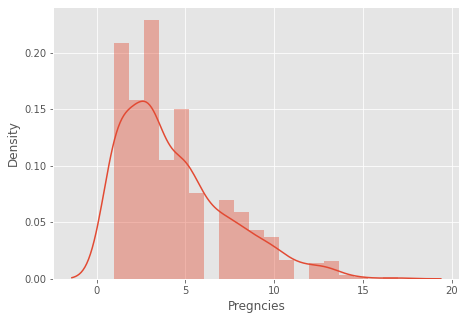

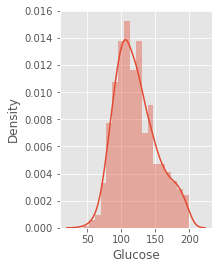

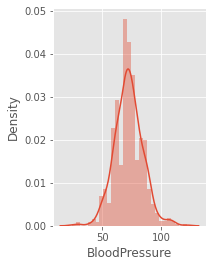

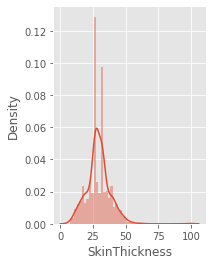

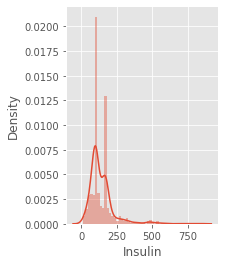

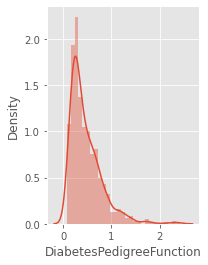

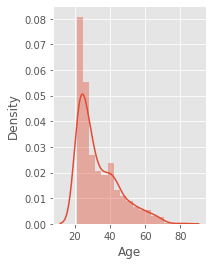

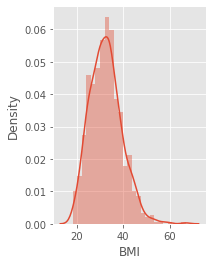

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df1['Pregncies'])
plt.show()
plt.subplot(1,2,2)
sns.distplot(df1['Glucose'])
plt.show()
plt.subplot(1,2,2)
sns.distplot(df1['BloodPressure'])
plt.show()
plt.subplot(1,2,2)
sns.distplot(df1['SkinThickness'])
plt.show()
plt.subplot(1,2,2)
sns.distplot(df1['Insulin'])
plt.show()
plt.subplot(1,2,2)
sns.distplot(df1['DiabetesPedigreeFunction'])
plt.show()
plt.subplot(1,2,2)
sns.distplot(df1['Age'])
plt.show()
plt.subplot(1,2,2)
sns.distplot(df1['BMI'])
plt.show()

## **Impute median for missing values** (without grouping)




In [ ]:
for i in columns:
  median = df2[i].median()
  print(median)
  for c in range(df2[i].size):
    if(isNaN(df2[i][c])):
      df2[i][c] = median

4.0
117.0
72.0
29.0
125.0
32.3
0.371
29.0


In [ ]:
df2.isnull().sum()

Pregncies                   0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

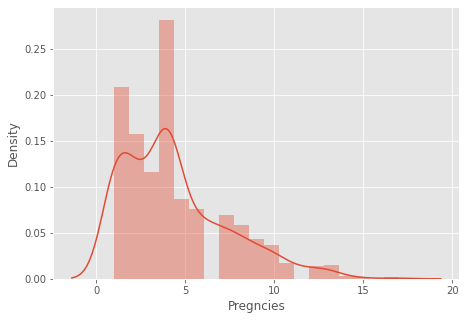

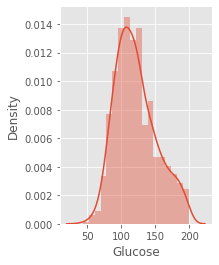

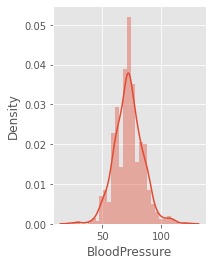

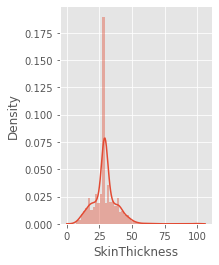

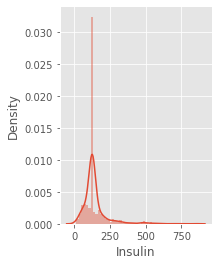

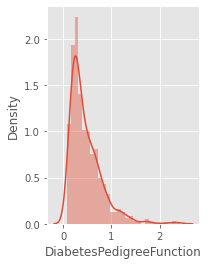

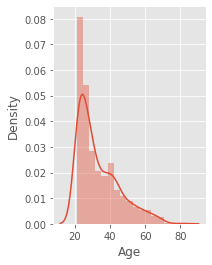

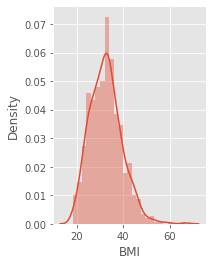

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df2['Pregncies'])
plt.show()
plt.subplot(1,2,2)
sns.distplot(df2['Glucose'])
plt.show()
plt.subplot(1,2,2)
sns.distplot(df2['BloodPressure'])
plt.show()
plt.subplot(1,2,2)
sns.distplot(df2['SkinThickness'])
plt.show()
plt.subplot(1,2,2)
sns.distplot(df2['Insulin'])
plt.show()
plt.subplot(1,2,2)
sns.distplot(df2['DiabetesPedigreeFunction'])
plt.show()
plt.subplot(1,2,2)
sns.distplot(df2['Age'])
plt.show()
plt.subplot(1,2,2)
sns.distplot(df2['BMI'])
plt.show()

## **Impute missing values using KNN and median**

 Do KNN impuation for missing values of Pregncies feature

In [ ]:
df3['Pregncies'].isnull().sum()

114

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
columns_1 = list(columns.copy())
columns_1.remove('Pregncies')
columns_1


['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [ ]:
# first imput median value for missing values except the Pregncies feature

# for i in columns_1:
#   median_0 = df3[(df1['Outcome'] == 0 )][i].median()
#   median_1 = df3[(df1['Outcome'] == 1 )][i].median()
#   print(median_0 , median_1)
#   for c in range(df3[i].size):
#     if(isNaN(df3[i][c])):
#       if(df3['Outcome'][c]==0): df3[i][c] = median_0
#       else: df3[i][c] = median_1

In [ ]:
df3.isnull().sum()

Pregncies                   114
Glucose                       8
BloodPressure                40
SkinThickness               231
Insulin                     375
BMI                          13
DiabetesPedigreeFunction      3
Age                           4
Outcome                       0
dtype: int64

In [ ]:
df3['Pregncies'].value_counts(dropna=False)

1.0     135
NaN     114
2.0     102
3.0      75
4.0      68
5.0      56
6.0      49
7.0      45
8.0      38
9.0      28
10.0     24
11.0     11
13.0     10
12.0      9
14.0      2
15.0      1
17.0      1
Name: Pregncies, dtype: int64

In [ ]:
df3

,Pregncies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31.0,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0
764,2.0,122.0,70.0,27.0,NaN,36.8,0.340,27.0,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0
766,1.0,126.0,60.0,NaN,NaN,30.1,0.349,47.0,1


In [ ]:
imputer_Pregncies = KNNImputer(n_neighbors=11)

In [ ]:
df3_knn_Pregncies = imputer_Pregncies.fit_transform(df3)

In [ ]:
from pandas.core.frame import DataFrame
df3_knn_Pregncies = DataFrame(df3_knn_Pregncies)
df3_knn_Pregncies
# 0 - Pregncies

,0,1,2,3,4,5,6,7,8
0,6.000000,148.0,72.0,35.000000,210.545455,33.6,0.627,50.0,1.0
1,1.000000,85.0,66.0,29.000000,67.636364,26.6,0.351,31.0,0.0
2,8.000000,183.0,64.0,27.909091,210.727273,23.3,0.672,32.0,1.0
3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21.0,0.0
4,4.818182,137.0,40.0,35.000000,168.000000,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
763,10.000000,101.0,76.0,48.000000,180.000000,32.9,0.171,63.0,0.0
764,2.000000,122.0,70.0,27.000000,153.363636,36.8,0.340,27.0,0.0
765,5.000000,121.0,72.0,23.000000,112.000000,26.2,0.245,30.0,0.0
766,1.000000,126.0,60.0,30.181818,132.545455,30.1,0.349,47.0,1.0


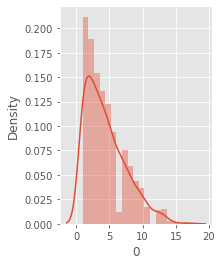

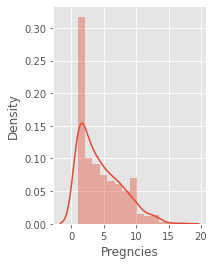

In [ ]:
plt.subplot(1,2,2)
sns.distplot(df3_knn_Pregncies[0])
plt.show()

plt.subplot(1,2,2)
sns.distplot(df3['Pregncies'])
plt.show()

In [ ]:
df3['Insulin'].value_counts(dropna=False)

NaN      375
105.0     11
130.0      9
120.0      8
140.0      8
        ... 
73.0       1
171.0      1
255.0      1
52.0       1
112.0      1
Name: Insulin, Length: 186, dtype: int64

In [ ]:
df3_notnull = df3.copy()
df3_notnull = df3_notnull.dropna()
df3_notnull.isnull().sum()
#df3_notnull.values
unique_values_insulin = list(df3_notnull.Insulin.unique())
count_unique_insulin = [len(df3_notnull[df3_notnull['Insulin'] == x]) for x in unique_values_insulin]

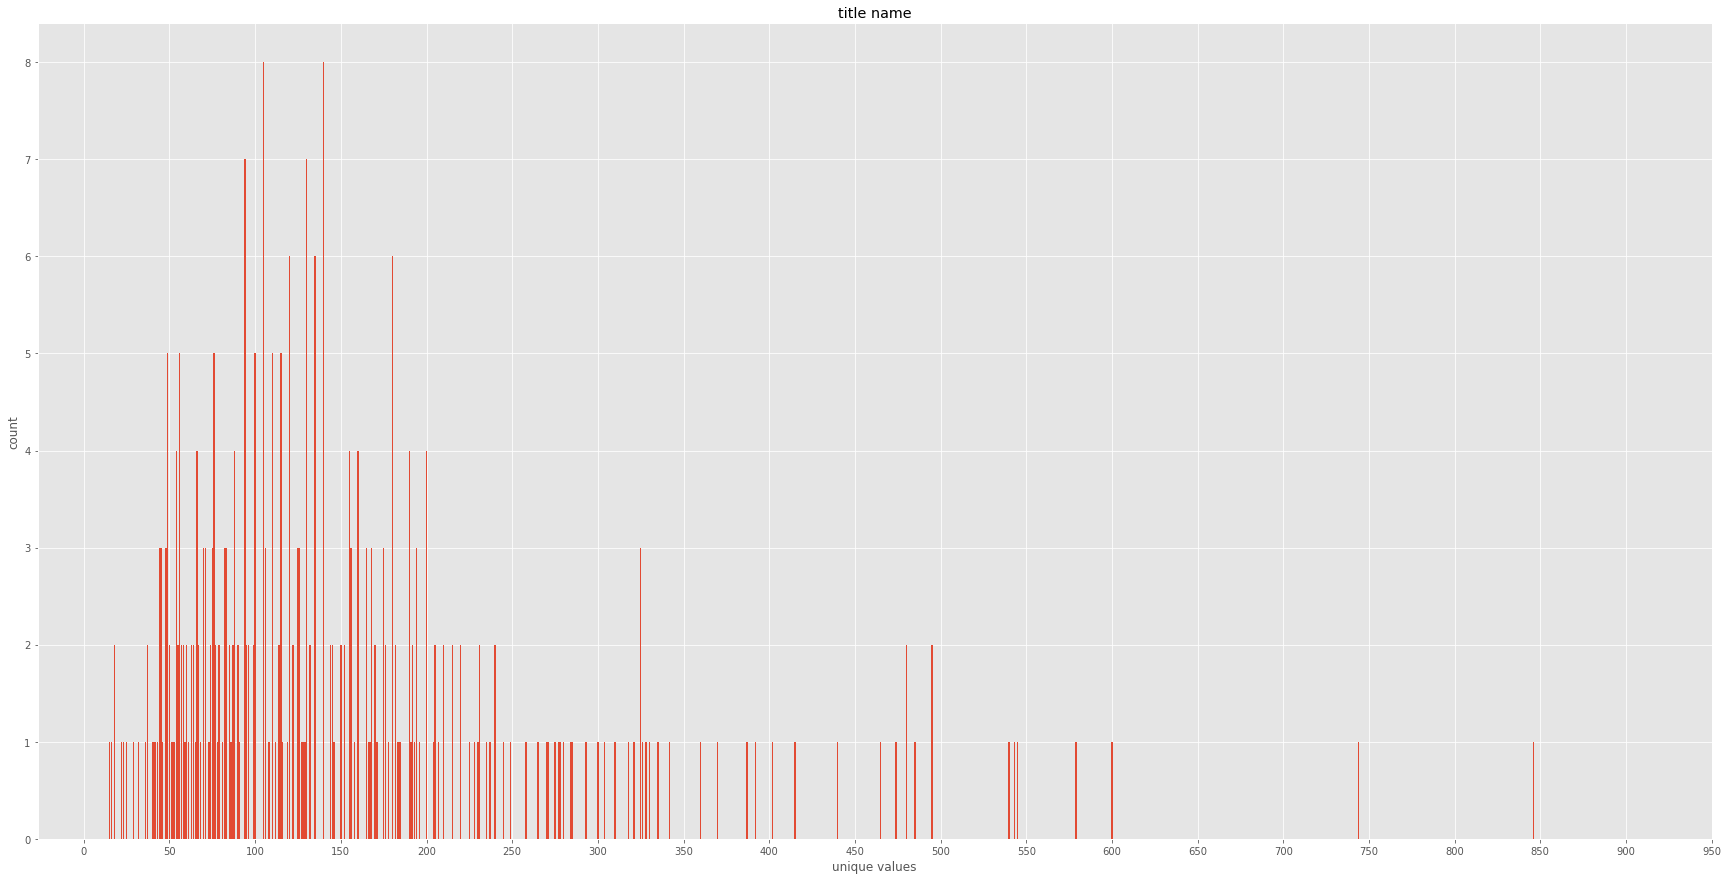

In [ ]:
plt.subplots(figsize=(30, 15))
plt.bar(unique_values_insulin,count_unique_insulin)
x = np.arange(0, 1000, 50)
plt.xticks(x)
plt.title('title name')
plt.xlabel('unique values')
plt.ylabel('count')
plt.show()

In [ ]:
# k = 6

In [ ]:
imputer_Insulin = KNNImputer(n_neighbors=6)
df3_knn_Insulin = imputer_Insulin.fit_transform(df3)
df3_knn_Insulin = DataFrame(df3_knn_Insulin)
df3_knn_Insulin
# 4 - Insulin

,0,1,2,3,4,5,6,7,8
0,6.000000,148.0,72.0,35.000000,178.833333,33.6,0.627,50.0,1.0
1,1.000000,85.0,66.0,29.000000,60.666667,26.6,0.351,31.0,0.0
2,8.000000,183.0,64.0,26.500000,167.166667,23.3,0.672,32.0,1.0
3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21.0,0.0
4,5.833333,137.0,40.0,35.000000,168.000000,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
763,10.000000,101.0,76.0,48.000000,180.000000,32.9,0.171,63.0,0.0
764,2.000000,122.0,70.0,27.000000,163.500000,36.8,0.340,27.0,0.0
765,5.000000,121.0,72.0,23.000000,112.000000,26.2,0.245,30.0,0.0
766,1.000000,126.0,60.0,36.166667,135.166667,30.1,0.349,47.0,1.0


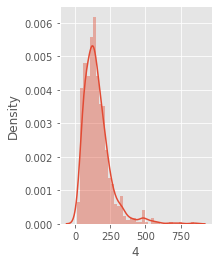

In [ ]:
plt.subplot(1,2,2)
sns.distplot(df3_knn_Insulin[4])
plt.show()

In [ ]:
unique_values_age = list(df3_notnull.Age.unique())
count_unique_age = [len(df3_notnull[df3_notnull['Age'] == x]) for x in unique_values_age]

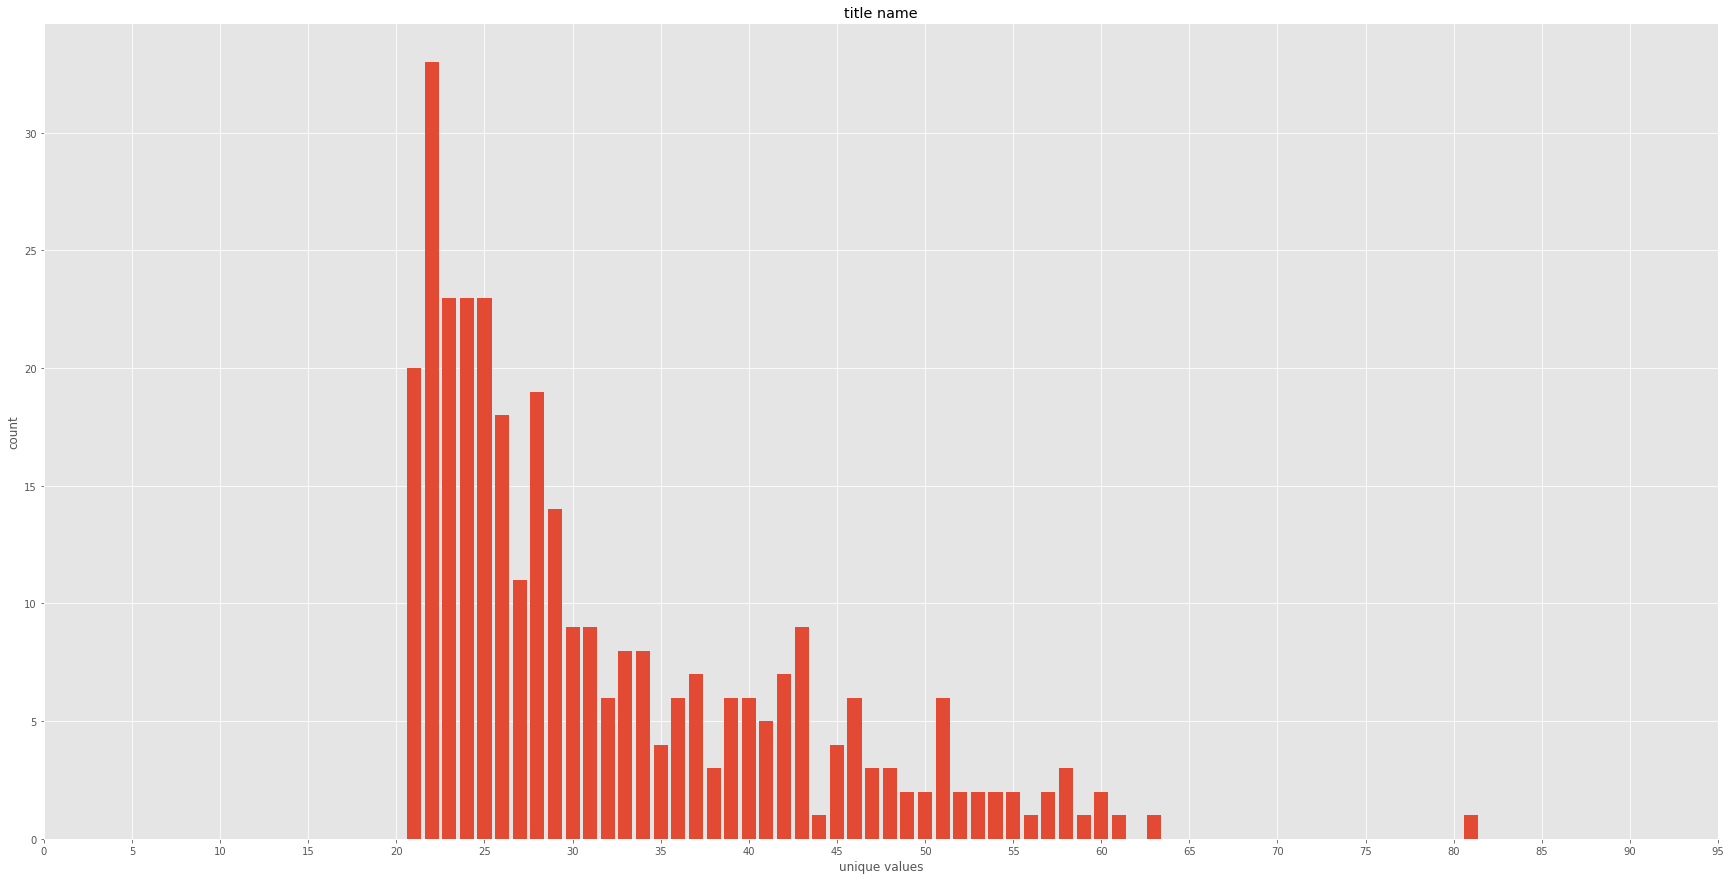

In [ ]:
plt.subplots(figsize=(30, 15))
plt.bar(unique_values_age,count_unique_age)
x = np.arange(0, 100, 5)
plt.xticks(x)
plt.title('title name')
plt.xlabel('unique values')
plt.ylabel('count')
plt.show()

In [ ]:
# k = 3

In [ ]:
imputer_Age = KNNImputer(n_neighbors=3)
df3_knn_Age = imputer_Age.fit_transform(df3)
df3_knn_Age = DataFrame(df3_knn_Age)
df3_knn_Age
# 7 - Age

,0,1,2,3,4,5,6,7,8
0,6.000000,148.0,72.0,35.000000,125.333333,33.6,0.627,50.0,1.0
1,1.000000,85.0,66.0,29.000000,82.666667,26.6,0.351,31.0,0.0
2,8.000000,183.0,64.0,30.000000,195.000000,23.3,0.672,32.0,1.0
3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21.0,0.0
4,8.666667,137.0,40.0,35.000000,168.000000,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
763,10.000000,101.0,76.0,48.000000,180.000000,32.9,0.171,63.0,0.0
764,2.000000,122.0,70.0,27.000000,166.666667,36.8,0.340,27.0,0.0
765,5.000000,121.0,72.0,23.000000,112.000000,26.2,0.245,30.0,0.0
766,1.000000,126.0,60.0,35.333333,120.666667,30.1,0.349,47.0,1.0


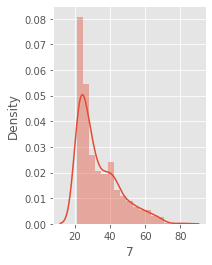

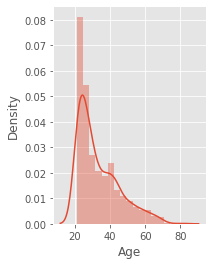

In [ ]:
plt.subplot(1,2,2)
sns.distplot(df3_knn_Age[7])
plt.show()

plt.subplot(1,2,2)
sns.distplot(df3['Age'])
plt.show()

In [ ]:
unique_values_thickness = list(df3_notnull.SkinThickness.unique())
count_unique_thickess = [len(df3_notnull[df3_notnull['SkinThickness'] == x]) for x in unique_values_thickness]

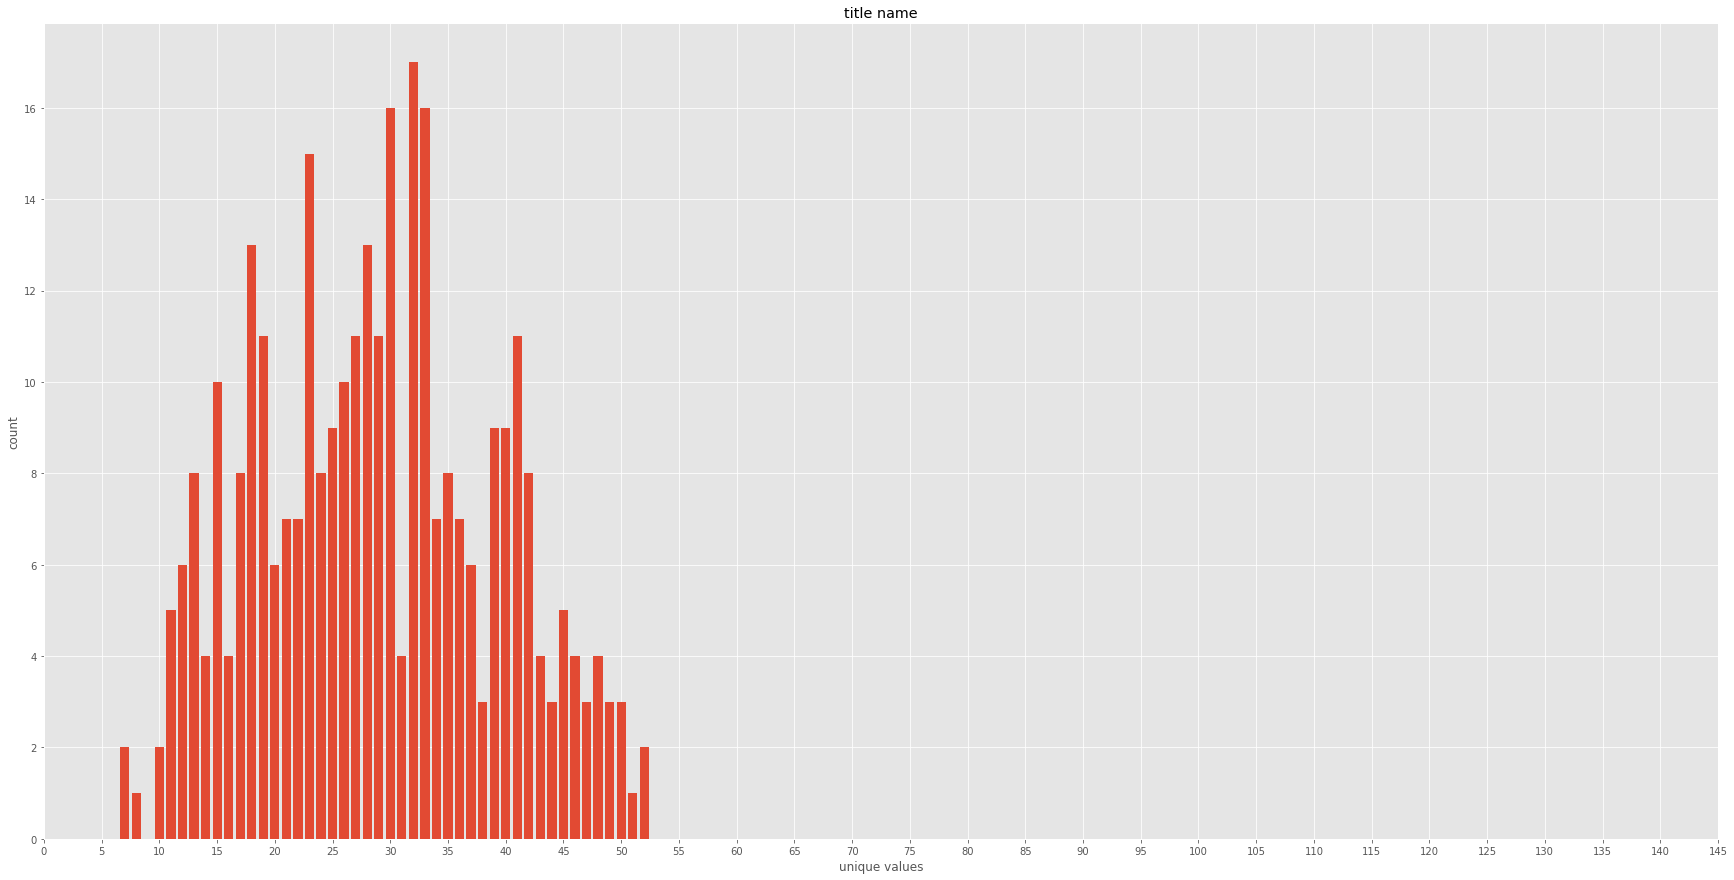

In [ ]:
plt.subplots(figsize=(30, 15))
plt.bar(unique_values_thickness,count_unique_thickess)
x = np.arange(0, 150, 5)
plt.xticks(x)
plt.title('title name')
plt.xlabel('unique values')
plt.ylabel('count')
plt.show()

In [ ]:
# k = 2

In [ ]:
imputer_thickness = KNNImputer(n_neighbors=2)
df3_knn_thickness = imputer_thickness.fit_transform(df3)
df3_knn_thickness = DataFrame(df3_knn_thickness)
df3_knn_thickness
# 3 - SkinThickness

,0,1,2,3,4,5,6,7,8
0,6.0,148.0,72.0,35.0,113.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,88.5,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,24.0,227.5,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,6.5,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0
764,2.0,122.0,70.0,27.0,202.5,36.8,0.340,27.0,0.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0
766,1.0,126.0,60.0,33.5,123.5,30.1,0.349,47.0,1.0


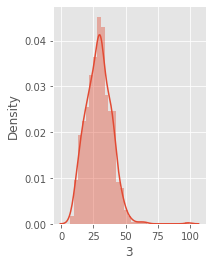

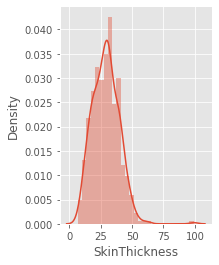

In [ ]:
plt.subplot(1,2,2)
sns.distplot(df3_knn_thickness[3])
plt.show()

plt.subplot(1,2,2)
sns.distplot(df3['SkinThickness'])
plt.show()

*Now combine knn and median impuation results*

In [ ]:
df3.isnull().sum()

Pregncies                   114
Glucose                       8
BloodPressure                40
SkinThickness               231
Insulin                     375
BMI                          13
DiabetesPedigreeFunction      3
Age                           4
Outcome                       0
dtype: int64

In [ ]:
for i in columns:
  median_0 = df3[(df3['Outcome'] == 0 )][i].median()
  median_1 = df3[(df3['Outcome'] == 1 )][i].median()
  print(median_0 , median_1)
  for c in range(df3[i].size):
    if(isNaN(df3[i][c])):
      if(df3['Outcome'][c]==0): df3[i][c] = median_0
      else: df3[i][c] = median_1

3.0 5.0
107.0 140.0
70.0 74.5
27.0 32.0
100.0 169.5
30.1 34.3
0.336 0.4515
27.0 36.0


In [ ]:
df3['Pregncies'] = df3_knn_Pregncies[0]
df3['Insulin'] = df3_knn_Insulin[4]
df3['Age'] = df3_knn_Age[7]
df3['SkinThickness'] = df3_knn_thickness[3]

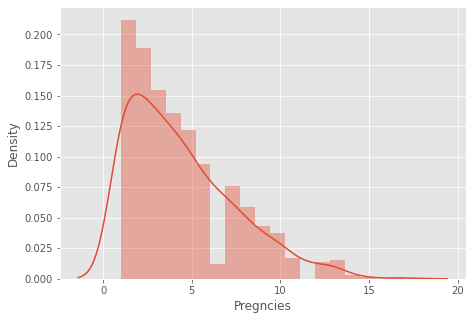

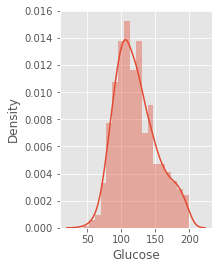

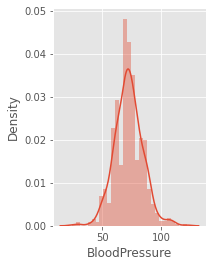

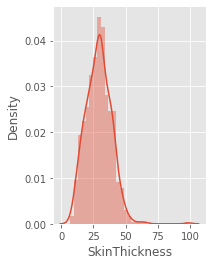

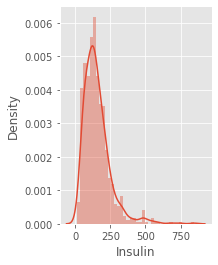

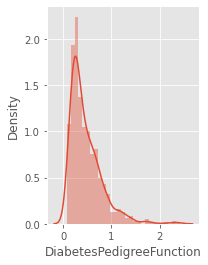

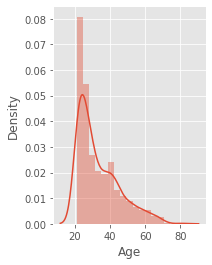

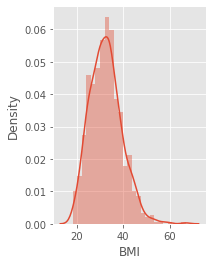

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df3['Pregncies'])
plt.show()
plt.subplot(1,2,2)
sns.distplot(df3['Glucose'])
plt.show()
plt.subplot(1,2,2)
sns.distplot(df3['BloodPressure'])
plt.show()
plt.subplot(1,2,2)
sns.distplot(df3['SkinThickness'])
plt.show()
plt.subplot(1,2,2)
sns.distplot(df3['Insulin'])
plt.show()
plt.subplot(1,2,2)
sns.distplot(df3['DiabetesPedigreeFunction'])
plt.show()
plt.subplot(1,2,2)
sns.distplot(df3['Age'])
plt.show()
plt.subplot(1,2,2)
sns.distplot(df3['BMI'])
plt.show()

In [ ]:
# df3['Pregncies'].value_counts(dropna=False).head(10)

In [ ]:
# df3['Pregncies'].value_counts(dropna=False).head(30)

# Check Correlations

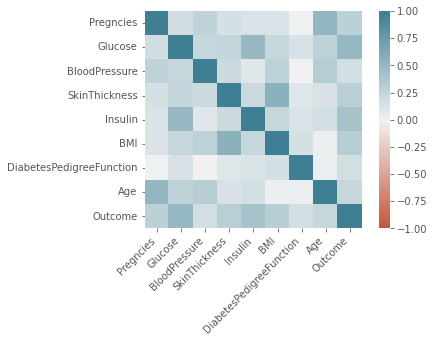

In [ ]:
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

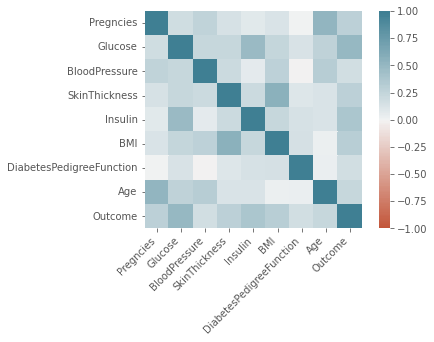

In [ ]:
corr = df1.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

# Handle Outliers

In [ ]:
def set_outlier_z_score(p,features):
  df = p.copy()
  df['outl']=False
  thres = 3
  for f in features:
    mean = df[f].mean()
    std = df[f].std()
    print(mean,std)
    for i in range(len(df[f])):
      z_score = (df[f][i]-mean)/std
      
      if (abs(z_score) > thres):
        df['outl'][i] = True
      
  return df 


In [ ]:
def set_outlier_quantile(p,features):
  df = p.copy()
  df['outl']=False
  for f in features:
    q1= df[f].quantile(q=0.25)
    q3= df[f].quantile(q=0.75)
    print(q1,q3)
    IQR = q3 -q1
    lower_bound = q1-(1.5*IQR)
    upper_bound = q3+(1.5*IQR)
    # print(lower_bound,upper_bound)
    for i in range(len(df[f])):
      # print(df[f][i])
      if df[f][i]<lower_bound or df[f][i]>upper_bound:
        df['outl'][i] = True
  return df 

Take copies of data frames df and df1

In [ ]:
df_z_all = df.copy()
df_z_some = df.copy()
df_q_all = df.copy()
df_q_some = df.copy()

df1_z_all = df1.copy()
df1_z_some = df1.copy()
df1_q_all = df1.copy()
df1_q_some = df1.copy()



In [ ]:
df_q_all = set_outlier_quantile(df , columns)
df_q_all

2.0 6.0
99.75 141.0
64.0 80.0
25.0 33.0
121.5 206.84615384615384
27.575000000000003 36.6
0.244 0.6245
24.0 41.0


,Pregncies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,outl
0,6.000000,148.0,72.0,35.0,206.846154,33.6,0.627,50.0,1,False
1,1.000000,85.0,66.0,29.0,130.250951,26.6,0.351,31.0,0,False
2,8.000000,183.0,64.0,33.0,206.846154,23.3,0.672,32.0,1,False
3,1.000000,89.0,66.0,23.0,94.000000,28.1,0.167,21.0,0,False
4,5.687225,137.0,40.0,35.0,168.000000,43.1,2.288,33.0,1,True
...,...,...,...,...,...,...,...,...,...,...
763,10.000000,101.0,76.0,48.0,180.000000,32.9,0.171,63.0,0,True
764,2.000000,122.0,70.0,27.0,130.250951,36.8,0.340,27.0,0,False
765,5.000000,121.0,72.0,23.0,112.000000,26.2,0.245,30.0,0,False
766,1.000000,126.0,60.0,33.0,206.846154,30.1,0.349,47.0,1,False


In [ ]:
df_z_all = set_outlier_z_score(df , columns)
df_z_all

4.498814531770678 2.992606900058879
121.60216532462995 30.365372987192444
72.39857974439772 12.078202721076973
29.257878151260446 8.901885432647427
156.97948504679863 88.86745859413254
32.458036797266054 6.8743076664805995
0.4721900622595434 0.33108748783467695
33.24040097325526 11.753118482868873


,Pregncies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,outl
0,6.000000,148.0,72.0,35.0,206.846154,33.6,0.627,50.0,1,False
1,1.000000,85.0,66.0,29.0,130.250951,26.6,0.351,31.0,0,False
2,8.000000,183.0,64.0,33.0,206.846154,23.3,0.672,32.0,1,False
3,1.000000,89.0,66.0,23.0,94.000000,28.1,0.167,21.0,0,False
4,5.687225,137.0,40.0,35.0,168.000000,43.1,2.288,33.0,1,True
...,...,...,...,...,...,...,...,...,...,...
763,10.000000,101.0,76.0,48.0,180.000000,32.9,0.171,63.0,0,False
764,2.000000,122.0,70.0,27.0,130.250951,36.8,0.340,27.0,0,False
765,5.000000,121.0,72.0,23.0,112.000000,26.2,0.245,30.0,0,False
766,1.000000,126.0,60.0,33.0,206.846154,30.1,0.349,47.0,1,False


In [ ]:
df_z_all.outl[df_z_all.outl == True].count()

48

In [ ]:
df_z_all.outl[df_z_all.outl == False].count()

720

In [ ]:
df_q_all.outl[df_q_all.outl == True].count()

139

In [ ]:
df_q_all.outl[df_q_all.outl == False].count()

629

In [ ]:
def set_mean_any_outlier_z_score(p,features):
  df = p.copy()
  df['outl']=False
  thres = 3
  for f in features:
    mean = df[f].mean()
    std = df[f].std()
    print(mean,std)
    for i in range(len(df[f])):
      z_score = (df[f][i]-mean)/std
      
      if (abs(z_score) > thres):
        df['outl'][i] = True
      
  return df 

## Transformations for skewed data

In [ ]:
df_trans = df.copy()

In [ ]:
df_trans["Log_Pregncies"] = df_trans['Pregncies'].map(lambda i: np.log(i) if i > 0 else 0)

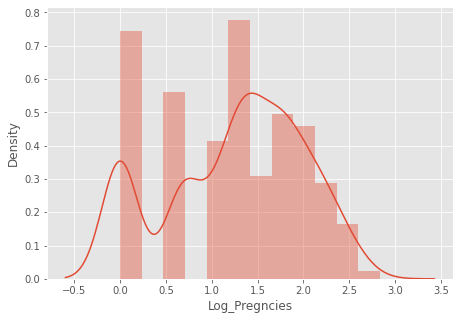

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df_trans['Log_Pregncies'])
plt.show()

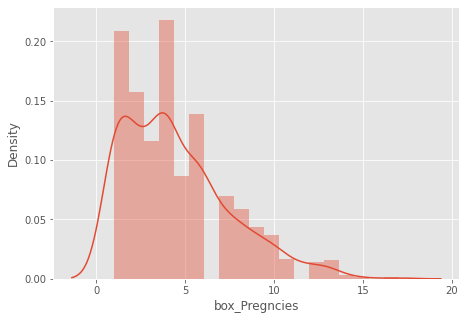

In [ ]:
df_trans["box_Pregncies"] = df_trans['Pregncies'].map(lambda i: np.abs(i) if i < 0 else (i+1 if i==0 else i))
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df_trans['box_Pregncies'])
plt.show()

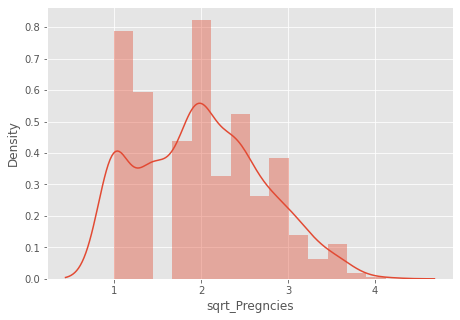

In [ ]:
df_trans["sqrt_Pregncies"] = df_trans['Pregncies'].map(lambda i: np.sqrt(i))
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df_trans['sqrt_Pregncies'])
plt.show()


Here squre root transformation give good result for skew data of Pregncies column values

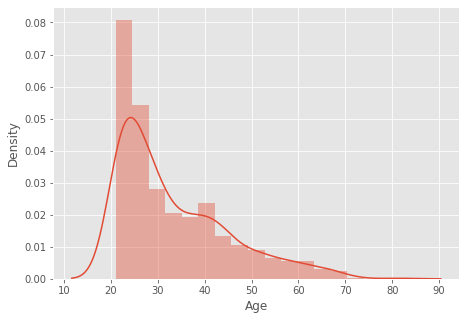

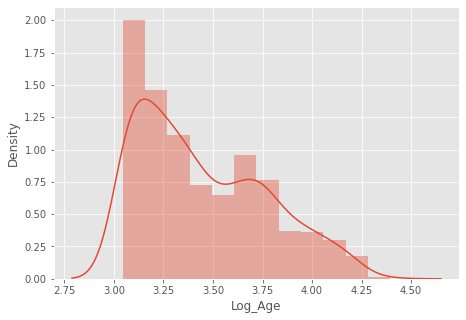

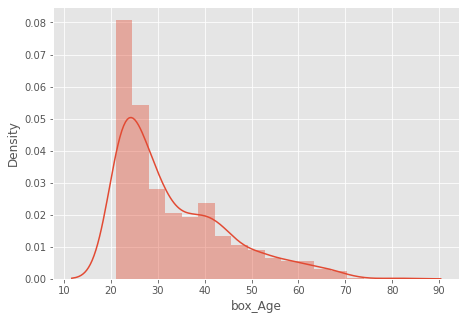

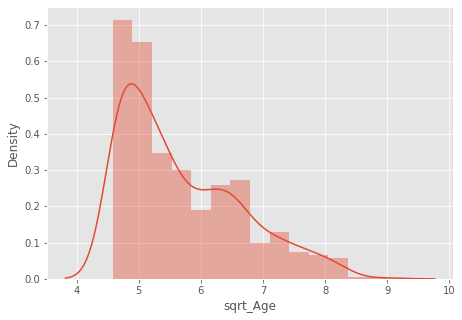

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df_trans['Age'])
plt.show()

df_trans["Log_Age"] = df_trans['Age'].map(lambda i: np.log(i) if i > 0 else 0)
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df_trans['Log_Age'])
plt.show()

df_trans["box_Age"] = df_trans['Age'].map(lambda i: np.abs(i) if i < 0 else (i+1 if i==0 else i))
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df_trans['box_Age'])
plt.show()

df_trans["sqrt_Age"] = df_trans['Age'].map(lambda i: np.sqrt(i))
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df_trans['sqrt_Age'])
plt.show()

Here log transformation give good result for Age column skewness.

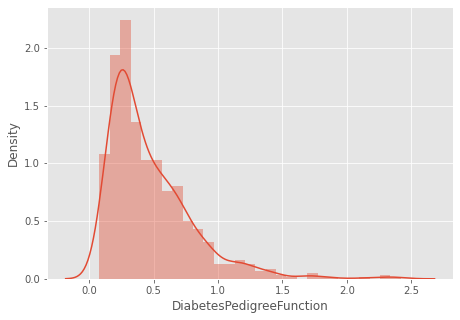

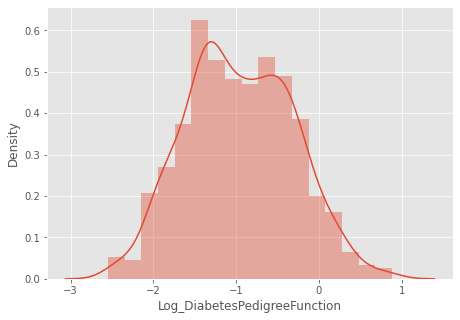

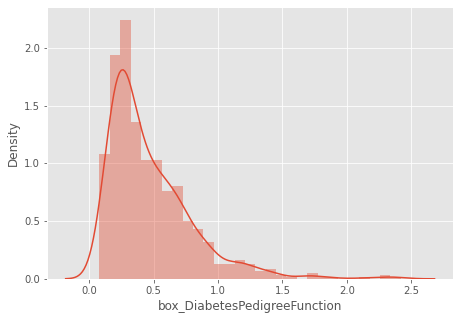

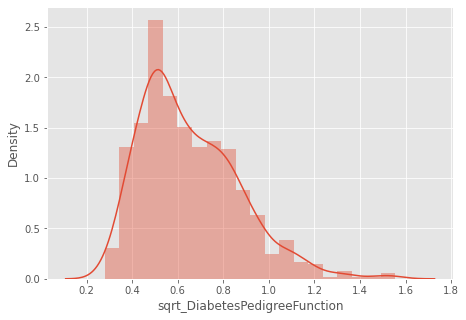

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df_trans['DiabetesPedigreeFunction'])
plt.show()

df_trans["Log_DiabetesPedigreeFunction"] = df_trans['DiabetesPedigreeFunction'].map(lambda i: np.log(i) if i > 0 else 0)
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df_trans['Log_DiabetesPedigreeFunction'])
plt.show()

df_trans["box_DiabetesPedigreeFunction"] = df_trans['DiabetesPedigreeFunction'].map(lambda i: np.abs(i) if i < 0 else (i+1 if i==0 else i))
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df_trans['box_DiabetesPedigreeFunction'])
plt.show()

df_trans["sqrt_DiabetesPedigreeFunction"] = df_trans['DiabetesPedigreeFunction'].map(lambda i: np.sqrt(i))
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df_trans['sqrt_DiabetesPedigreeFunction'])
plt.show()

For DiabetesPedigreeFunction column log transformation gives good result for its skewness.

## Outlier Treatment

sources refernces - [link text](https://www.pluralsight.com/guides/cleaning-up-data-from-outliers)


---



### ***First do for data frame which imputaion done by mean value***

### Quantile-based Flooring and Capping

In [ ]:
df_out_fl = df.copy()

In [ ]:
for i in columns:
  limit_l = df[i].quantile(0.10)
  limit_u = df[i].quantile(0.90)
  df_out_fl[i] = np.where(df_out_fl[i] <limit_l, limit_l,df_out_fl[i])
  df_out_fl[i] = np.where(df_out_fl[i] >limit_u, limit_u,df_out_fl[i])

In [ ]:
df_out_fl

,Pregncies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000000,148.0,72.0,35.0,206.846154,33.6,0.6270,50.0,1
1,1.000000,86.7,66.0,29.0,130.250951,26.6,0.3510,31.0,0
2,8.000000,167.0,64.0,33.0,206.846154,24.0,0.6720,32.0,1
3,1.000000,89.0,66.0,23.0,94.000000,28.1,0.1670,22.0,0
4,5.687225,137.0,58.0,35.0,168.000000,41.5,0.8786,33.0,1
...,...,...,...,...,...,...,...,...,...
763,9.000000,101.0,76.0,40.0,180.000000,32.9,0.1710,51.0,0
764,2.000000,122.0,70.0,27.0,130.250951,36.8,0.3400,27.0,0
765,5.000000,121.0,72.0,23.0,112.000000,26.2,0.2450,30.0,0
766,1.000000,126.0,60.0,33.0,206.846154,30.1,0.3490,47.0,1


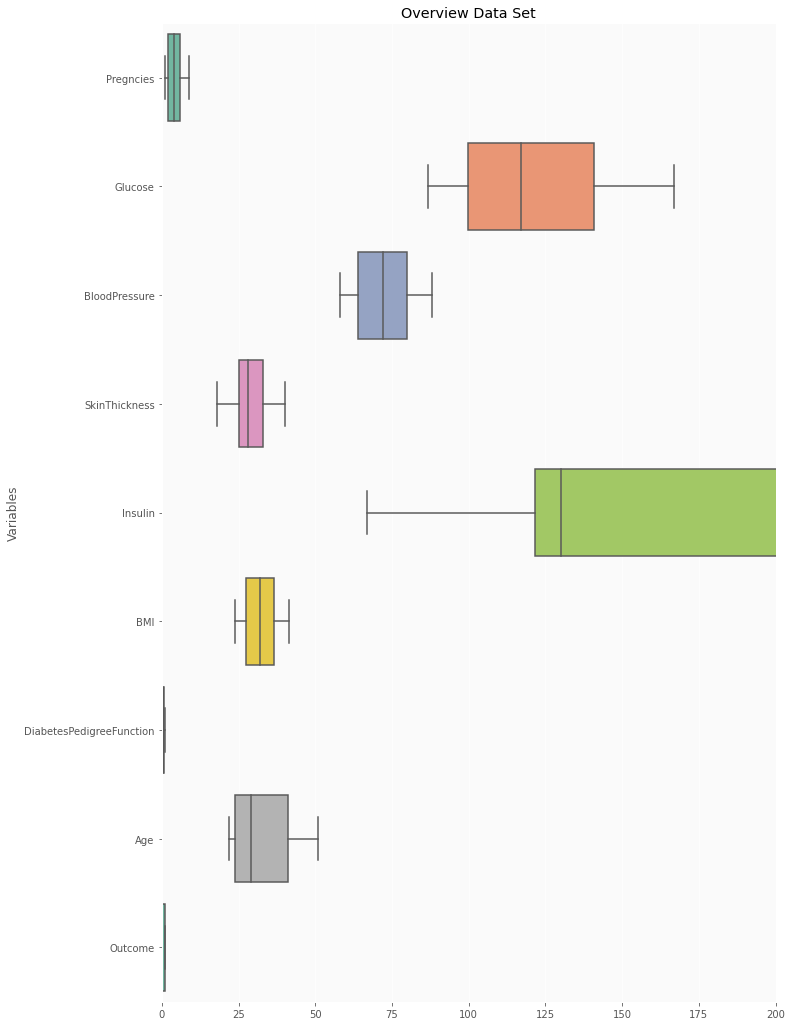

In [ ]:
plt.style.use('ggplot') # Using ggplot2 style visuals 

f, ax = plt.subplots(figsize=(11, 18))

ax.set_facecolor('#fafafa')
ax.set(xlim=(-.05, 200))
plt.ylabel('Variables')
plt.title("Overview Data Set")
ax = sns.boxplot(data = df_out_fl, 
  orient = 'h', 
  palette = 'Set2')

In [ ]:
def plot_diagram(p):
  df = p.copy()
  plt.figure(figsize=(16,5))
  plt.subplot(1,2,1)
  sns.distplot(df['Pregncies'])
  plt.show()
  plt.subplot(1,2,2)
  sns.distplot(df['Glucose'])
  plt.show()
  plt.subplot(1,2,2)
  sns.distplot(df['BloodPressure'])
  plt.show()
  plt.subplot(1,2,2)
  sns.distplot(df['SkinThickness'])
  plt.show()
  plt.subplot(1,2,2)
  sns.distplot(df['Insulin'])
  plt.show()
  plt.subplot(1,2,2)
  sns.distplot(df['DiabetesPedigreeFunction'])
  plt.show()
  plt.subplot(1,2,2)
  sns.distplot(df['Age'])
  plt.show()
  plt.subplot(1,2,2)
  sns.distplot(df['BMI'])
  plt.show()


def plot_box_diagram(p):
  plt.style.use('ggplot') # Using ggplot2 style visuals 

  f, ax = plt.subplots(figsize=(11, 32))

  ax.set_facecolor('#fafafa')
  ax.set(xlim=(-.05, 200))
  plt.ylabel('Variables')
  plt.title("Overview Data Set")
  ax = sns.boxplot(data = p, 
    orient = 'h', 
    palette = 'Set2')

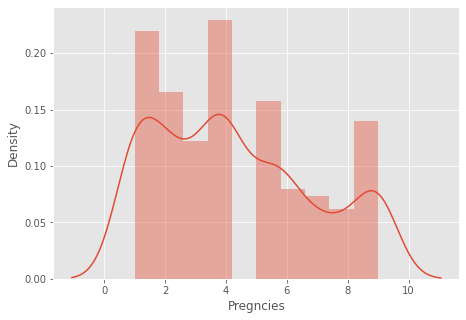

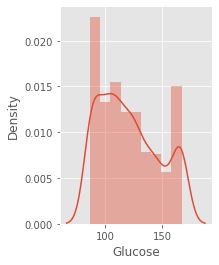

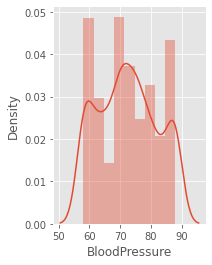

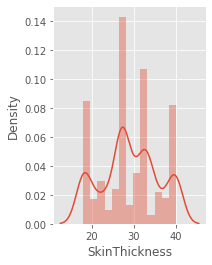

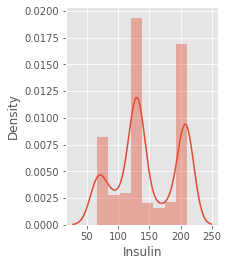

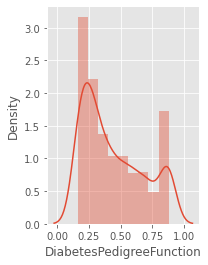

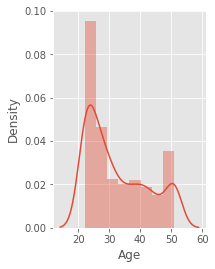

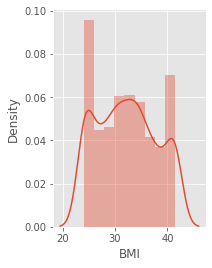

In [ ]:
plot_diagram(df_out_fl)

### IQR Score

In [ ]:
df_out_iqr = df.copy()

In [ ]:
Q1 = df.quantile(0.25)

Q3 = df.quantile(0.75)

IQR = Q3 - Q1

In [ ]:
df_out_iqr = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

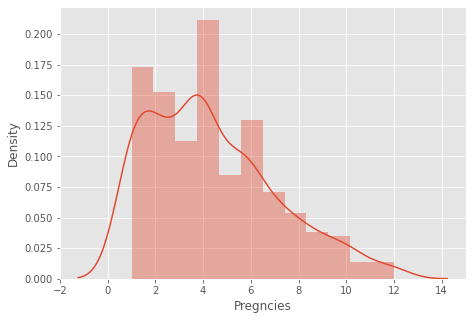

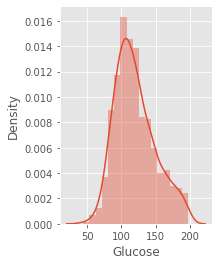

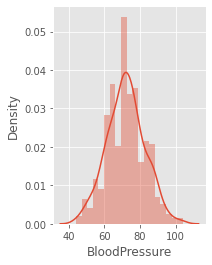

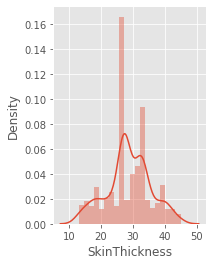

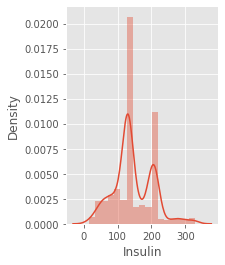

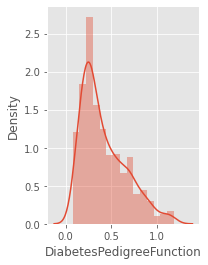

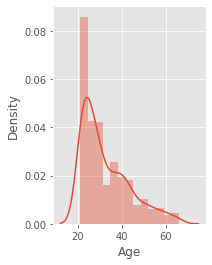

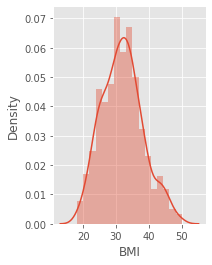

In [ ]:
plot_diagram(df_out_iqr)

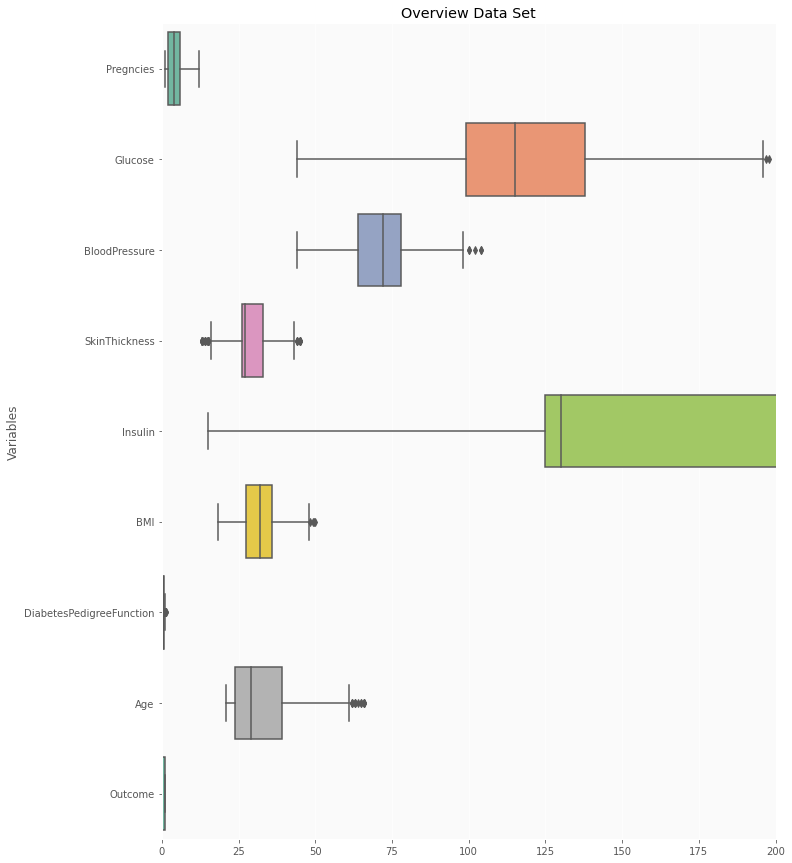

In [ ]:
plt.style.use('ggplot') # Using ggplot2 style visuals 

f, ax = plt.subplots(figsize=(11, 15))

ax.set_facecolor('#fafafa')
ax.set(xlim=(-.05, 200))
plt.ylabel('Variables')
plt.title("Overview Data Set")
ax = sns.boxplot(data = df_out_iqr, 
  orient = 'h', 
  palette = 'Set2')

### Replacing Outliers with Median Values

In [ ]:
df_out_median = df.copy()

In [ ]:
for i in columns:
  q1 = df[i].quantile(0.10)
  q2 = df[i].quantile(0.9)

  df_out_median[i] = np.where(df_out_median[i] <q1, df[i].median(),df_out_median[i])
  df_out_median[i] = np.where(df_out_median[i] >q2, df[i].median(),df_out_median[i])


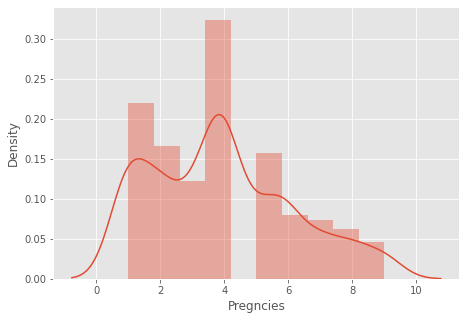

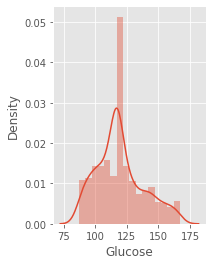

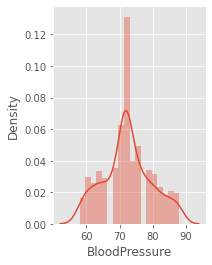

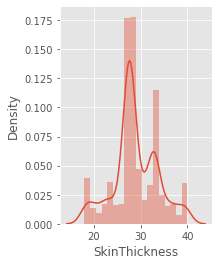

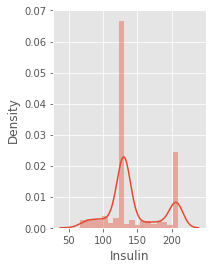

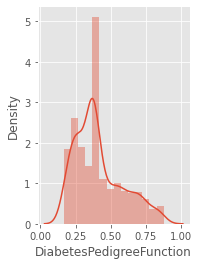

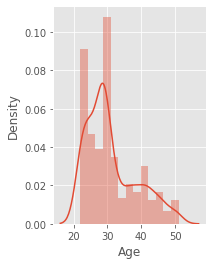

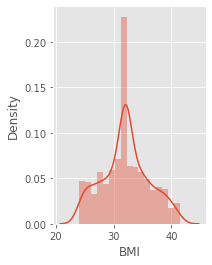

In [ ]:
plot_diagram(df_out_median)

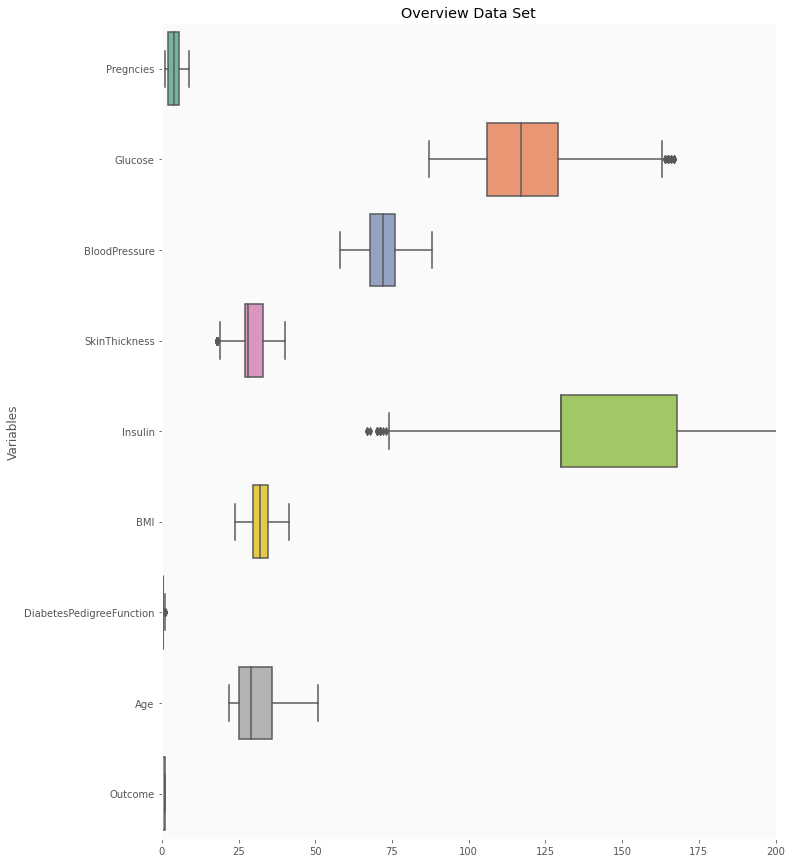

In [ ]:
plt.style.use('ggplot') # Using ggplot2 style visuals 

f, ax = plt.subplots(figsize=(11, 15))

ax.set_facecolor('#fafafa')
ax.set(xlim=(-.05, 200))
plt.ylabel('Variables')
plt.title("Overview Data Set")
ax = sns.boxplot(data = df_out_median, 
  orient = 'h', 
  palette = 'Set2')



---



### ***Secondly we do outliers treatment for dataset which imputation done by median (with grouping).***

### Quantile-based Flooring and Capping

In [ ]:
df1_out_fl = df1.copy()

In [ ]:
for i in columns:
  limit_l = df1[i].quantile(0.10)
  limit_u = df1[i].quantile(0.90)
  df1_out_fl[i] = np.where(df1_out_fl[i] <limit_l, limit_l,df1_out_fl[i])
  df1_out_fl[i] = np.where(df1_out_fl[i] >limit_u, limit_u,df1_out_fl[i])

In [ ]:
df1_out_fl

,Pregncies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,169.5,33.6,0.6270,50.0,1
1,1.0,86.7,66.0,29.0,100.0,26.6,0.3510,31.0,0
2,8.0,167.0,64.0,32.0,169.5,24.0,0.6720,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.1670,22.0,0
4,5.0,137.0,58.0,35.0,168.0,41.5,0.8786,33.0,1
...,...,...,...,...,...,...,...,...,...
763,9.0,101.0,76.0,40.0,180.0,32.9,0.1710,51.0,0
764,2.0,122.0,70.0,27.0,100.0,36.8,0.3400,27.0,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.2450,30.0,0
766,1.0,126.0,60.0,32.0,169.5,30.1,0.3490,47.0,1


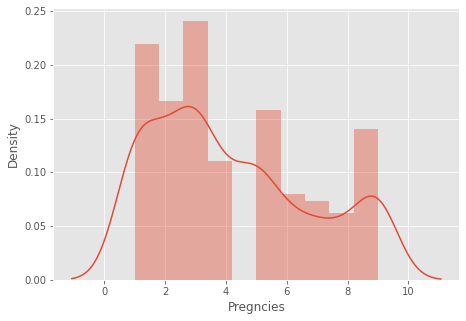

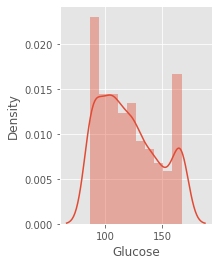

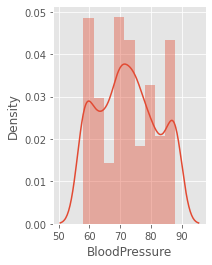

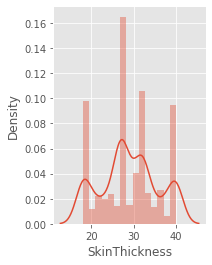

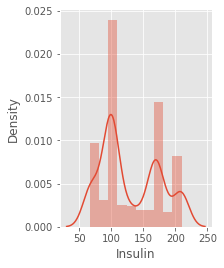

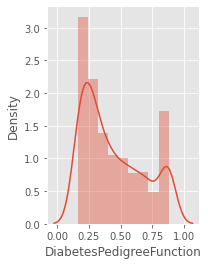

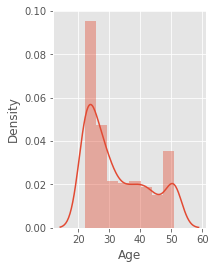

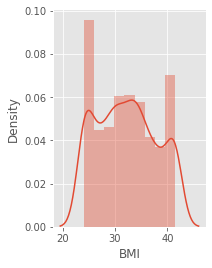

In [ ]:
plot_diagram(df1_out_fl)

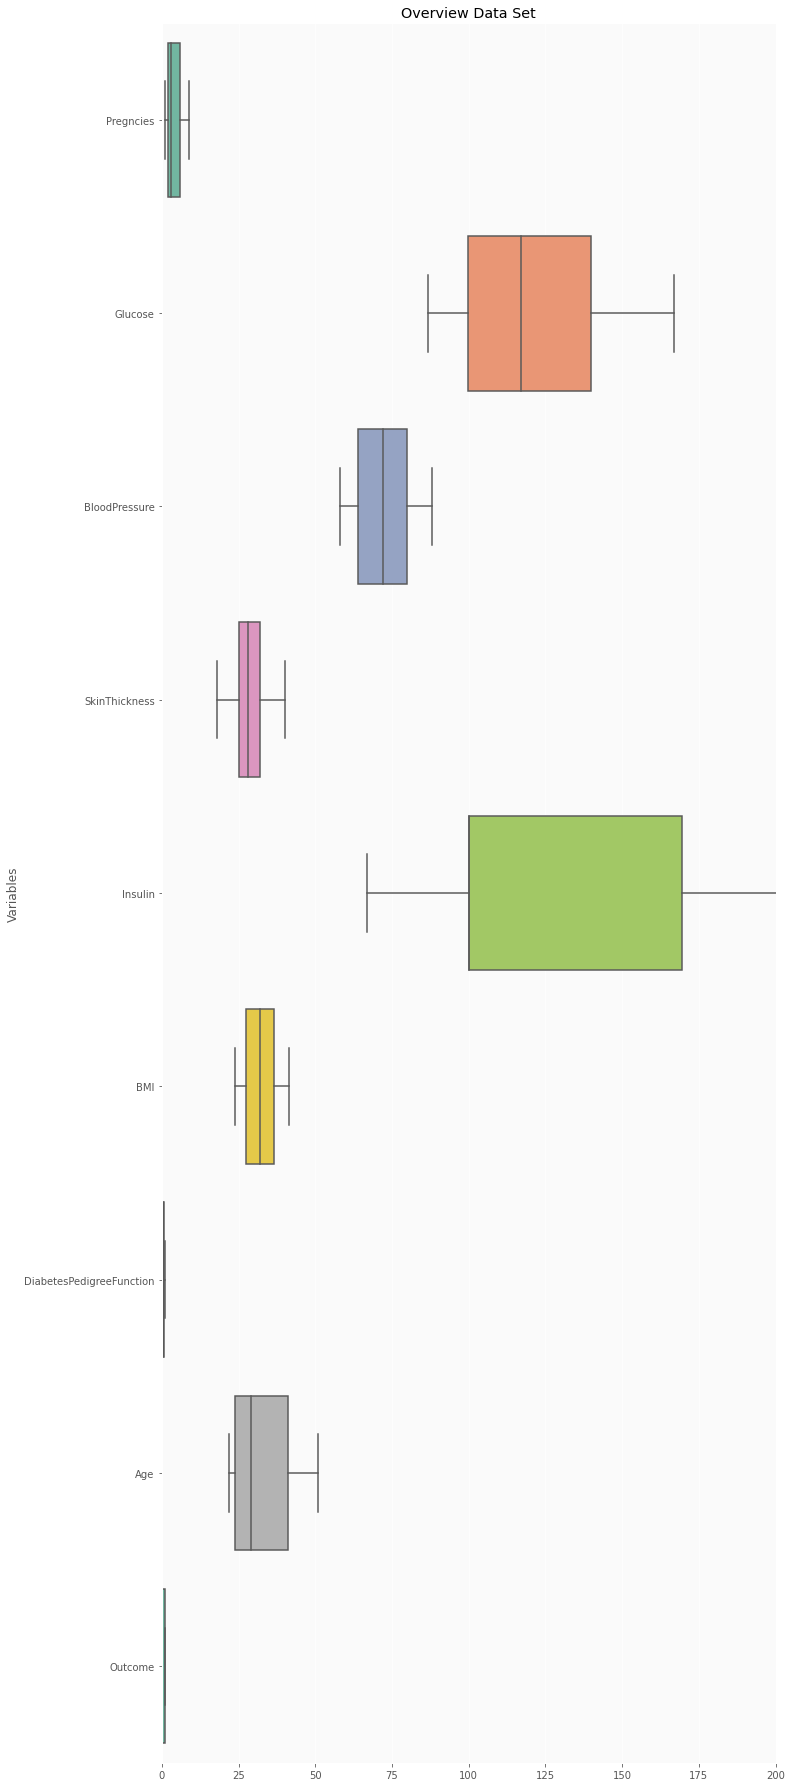

In [ ]:
plot_box_diagram(df1_out_fl)

### IQR Score

In [ ]:
df1_out_iqr = df1.copy()

In [ ]:
Q1_1 = df1.quantile(0.25)

Q3_1 = df1.quantile(0.75)

IQR_1 = Q3_1 - Q1_1

In [ ]:
df1_out_iqr = df1[~((df1 < (Q1_1 - 1.5 * IQR_1)) |(df1 > (Q3_1 + 1.5 * IQR_1))).any(axis=1)]

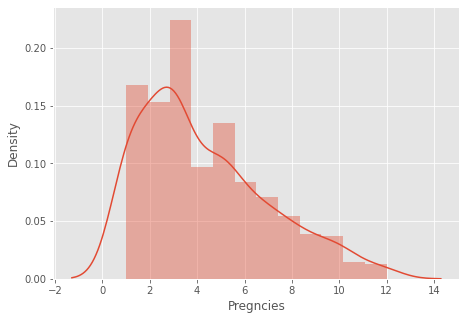

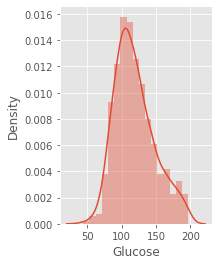

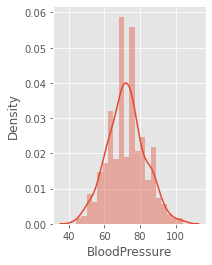

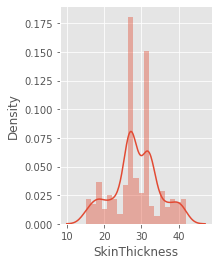

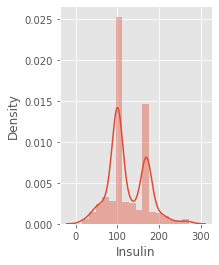

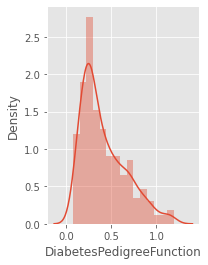

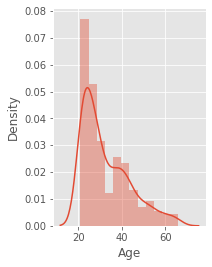

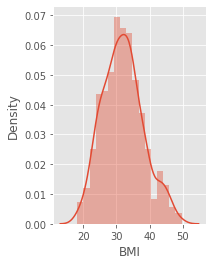

In [ ]:
plot_diagram(df1_out_iqr)

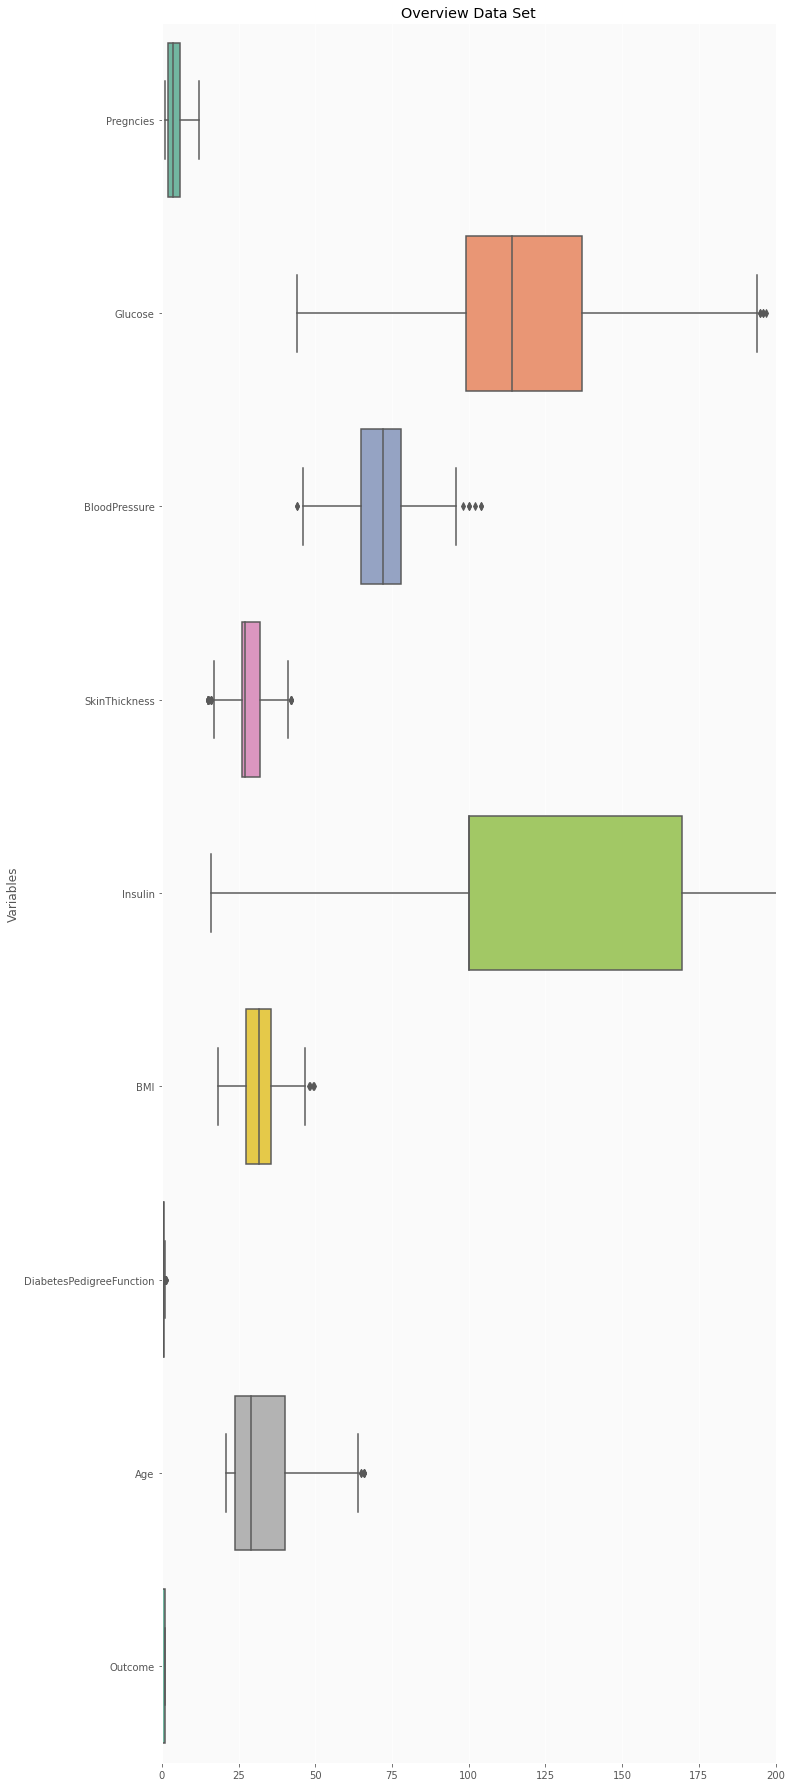

In [ ]:
plot_box_diagram(df1_out_iqr)

### Replacing Outliers with Median Values

In [ ]:
df1_out_median = df1.copy()

In [ ]:
for i in columns:
  q1 = df1[i].quantile(0.10)
  q2 = df1[i].quantile(0.9)

  df1_out_median[i] = np.where(df1_out_median[i] <q1, df1[i].median(),df1_out_median[i])
  df1_out_median[i] = np.where(df1_out_median[i] >q2, df1[i].median(),df1_out_median[i])

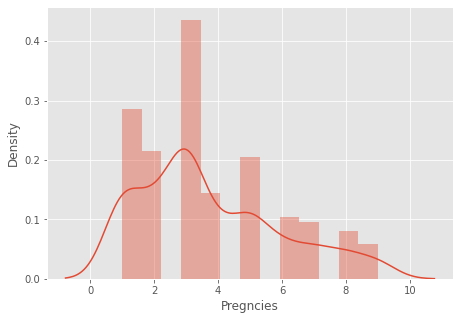

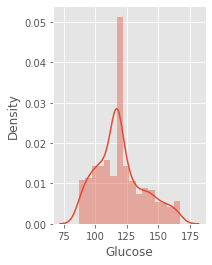

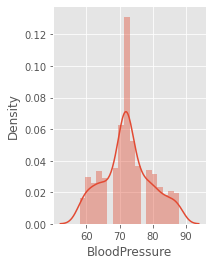

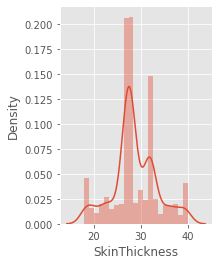

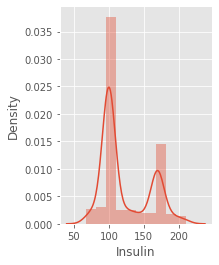

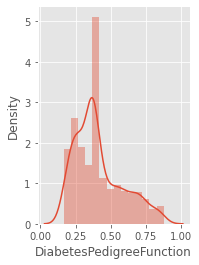

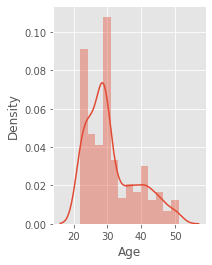

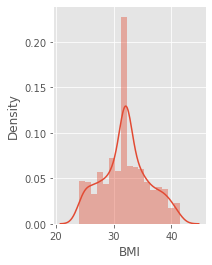

In [ ]:
plot_diagram(df1_out_median)

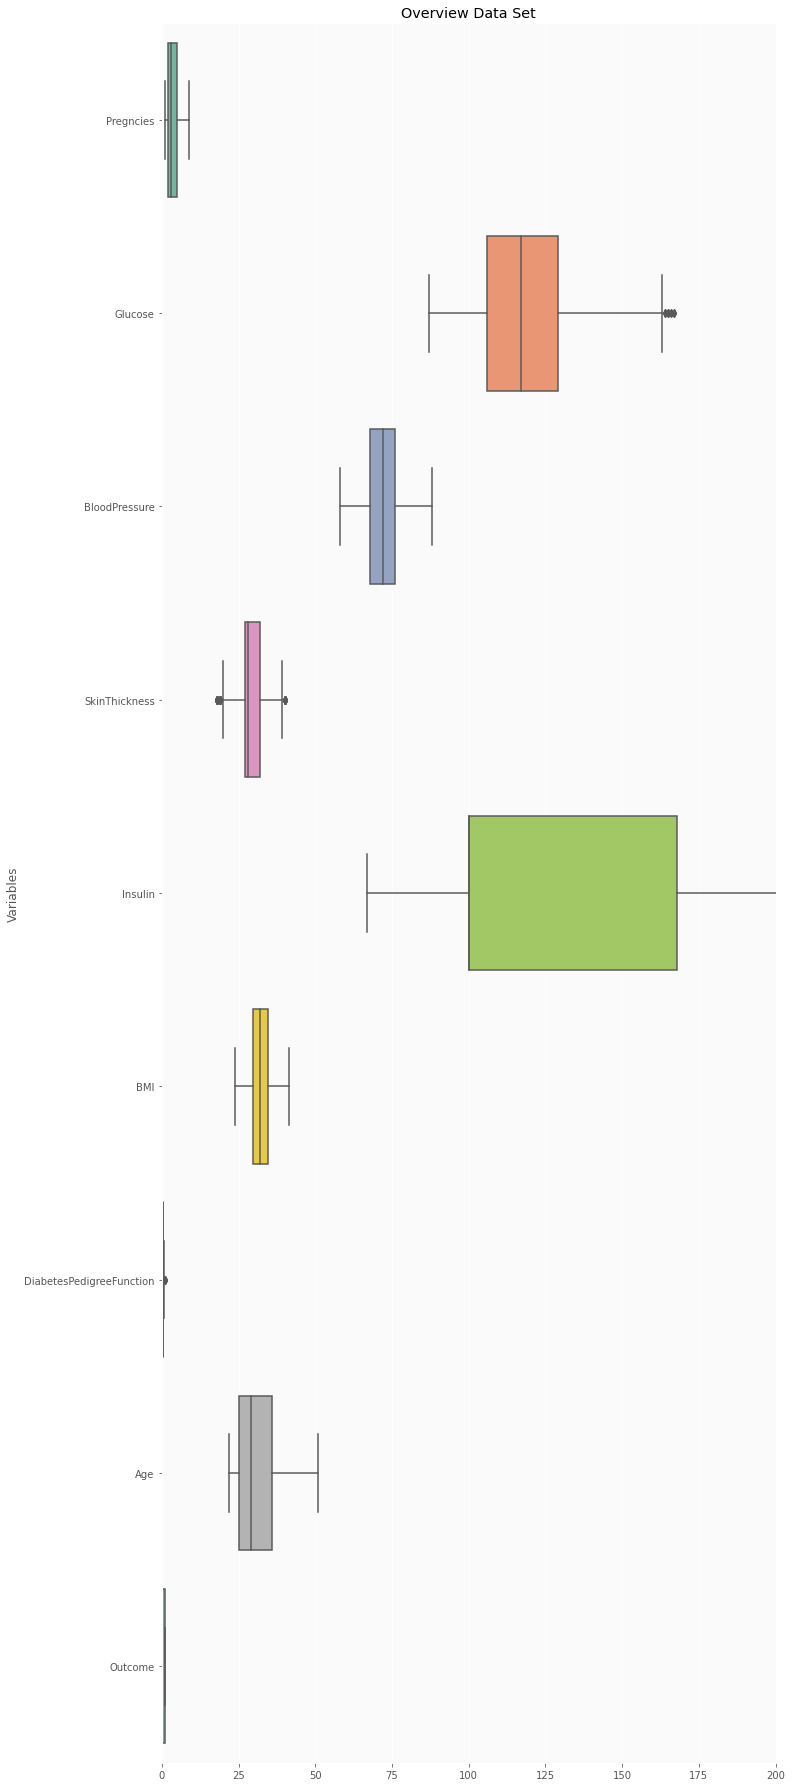

In [ ]:
plot_box_diagram(df1_out_median)



---


### ***Thirdly we do outliers treatment for dataset which imputation done by median and KNN (with grouping).***

### Quantile-based Flooring and Capping

In [ ]:
df3_out_fl = df3.copy()

In [ ]:
for i in columns:
  limit_l = df3[i].quantile(0.10)
  limit_u = df3[i].quantile(0.90)
  df3_out_fl[i] = np.where(df3_out_fl[i] <limit_l, limit_l,df3_out_fl[i])
  df3_out_fl[i] = np.where(df3_out_fl[i] >limit_u, limit_u,df3_out_fl[i])

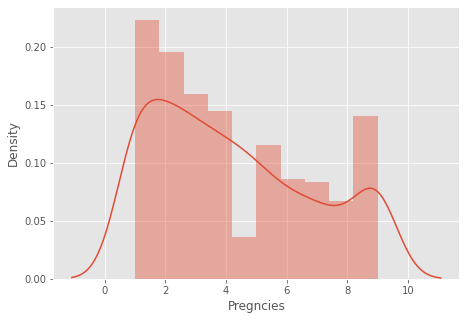

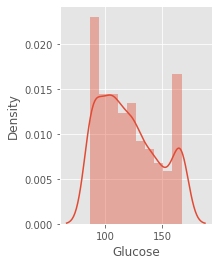

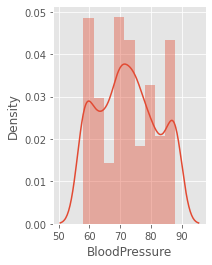

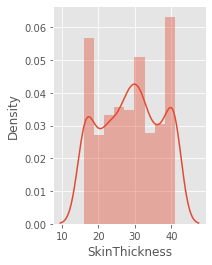

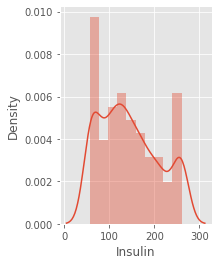

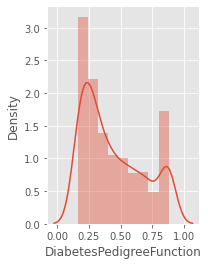

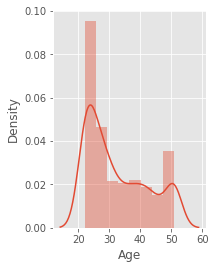

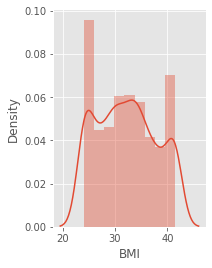

In [ ]:
plot_diagram(df3_out_fl)

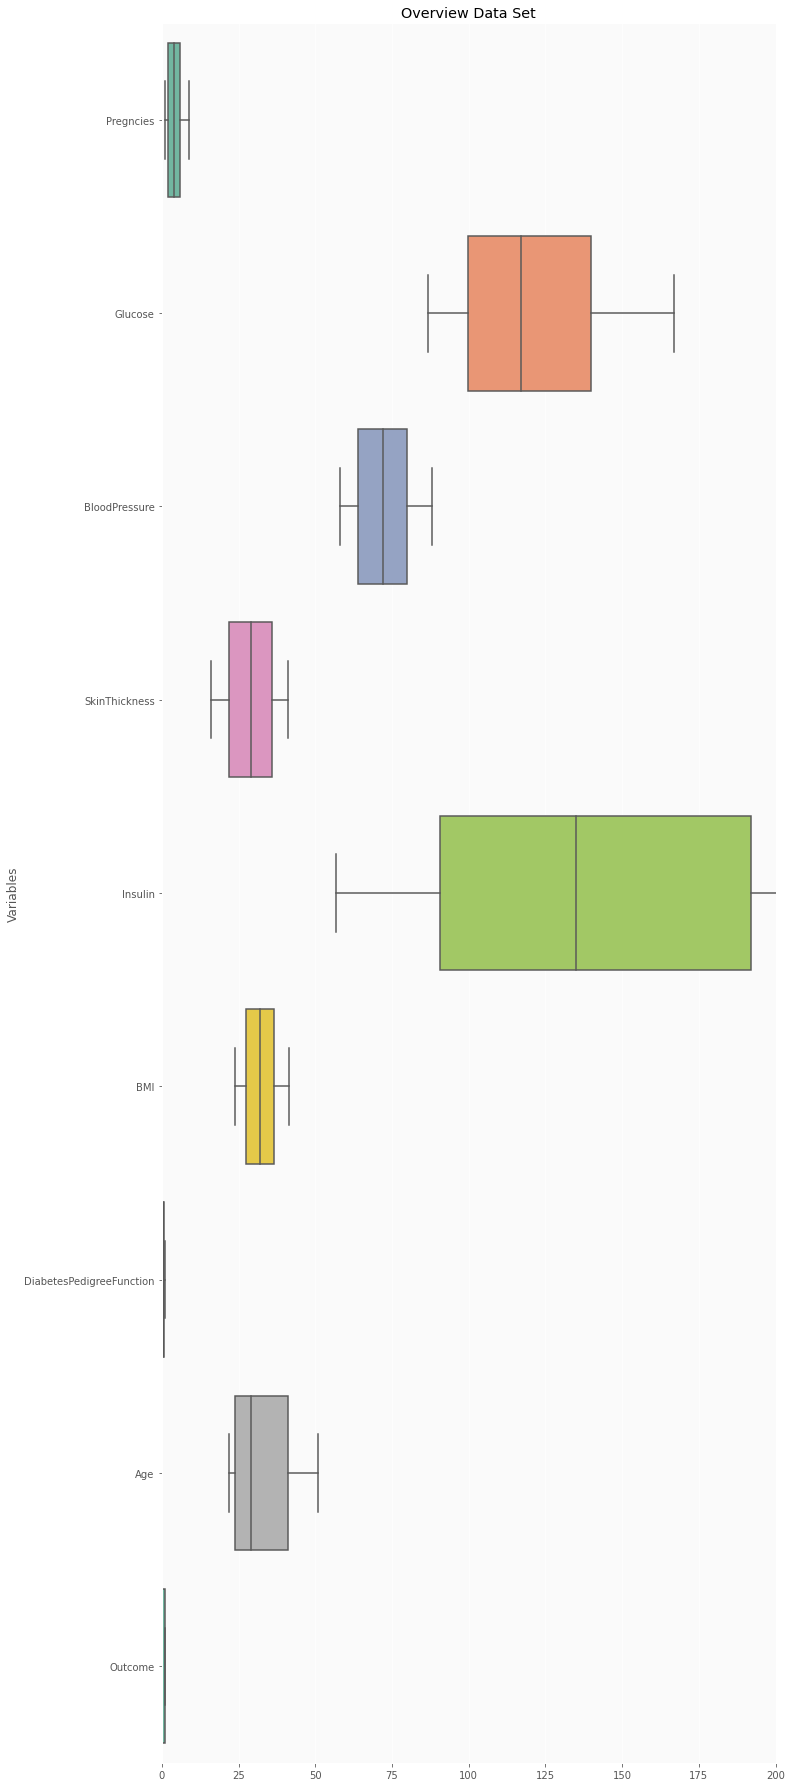

In [ ]:
plot_box_diagram(df3_out_fl)

### IQR Score

In [ ]:
df3_out_iqr = df3.copy()

In [ ]:
Q1_3 = df3.quantile(0.25)

Q3_3 = df3.quantile(0.75)

IQR_3 = Q3_3 - Q1_3

In [ ]:
df3_out_iqr = df3[~((df3 < (Q1_1 - 1.5 * IQR_3)) |(df3 > (Q3_3 + 1.5 * IQR_3))).any(axis=1)]

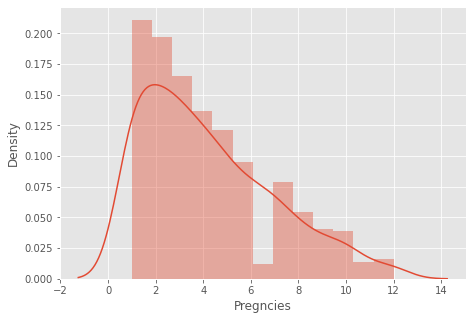

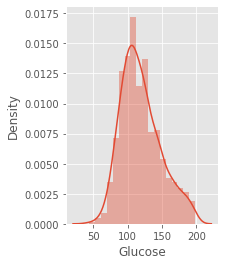

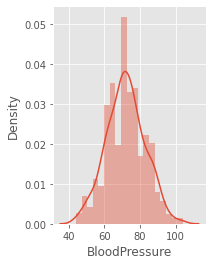

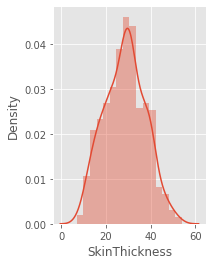

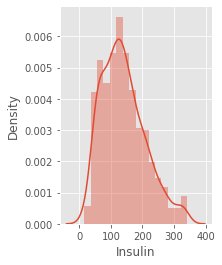

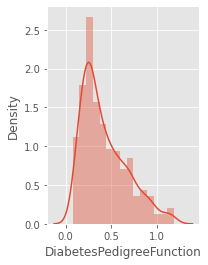

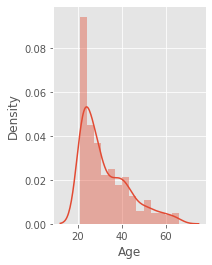

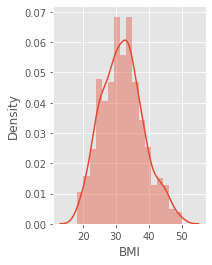

In [ ]:
plot_diagram(df3_out_iqr)

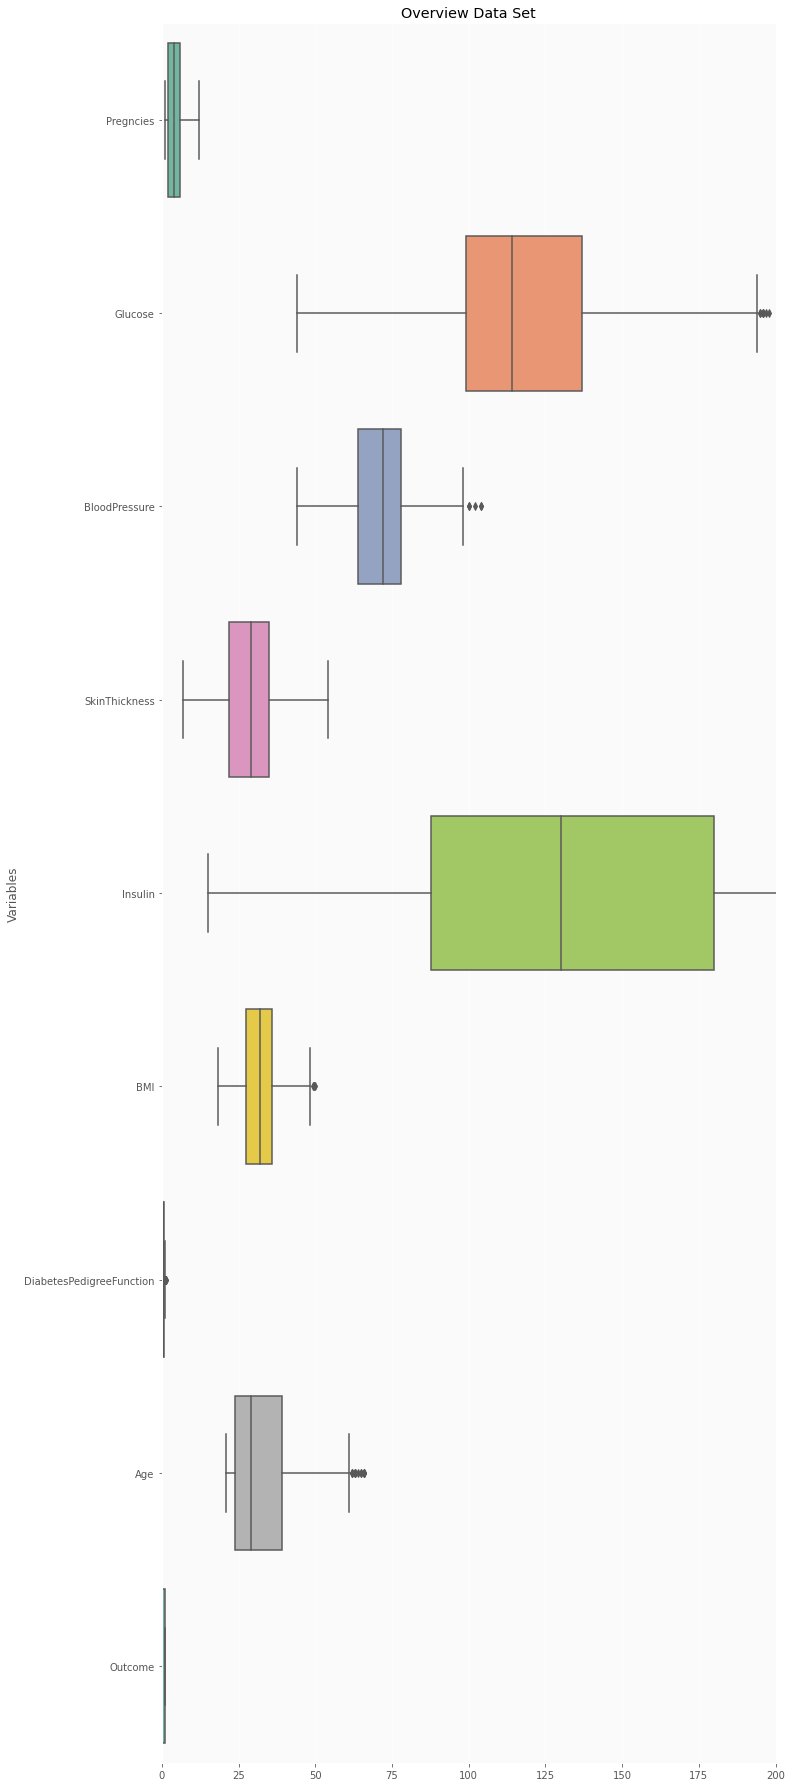

In [ ]:
plot_box_diagram(df3_out_iqr)

### Replacing Outliers with Median Values

In [ ]:
df3_out_median = df3.copy()

In [ ]:
for i in columns:
  q1 = df3[i].quantile(0.10)
  q2 = df3[i].quantile(0.9)

  df3_out_median[i] = np.where(df3_out_median[i] <q1, df3[i].median(),df3_out_median[i])
  df3_out_median[i] = np.where(df3_out_median[i] >q2, df3[i].median(),df3_out_median[i])

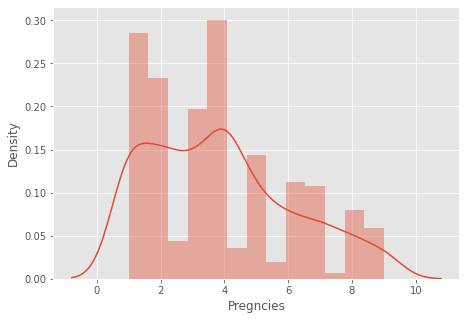

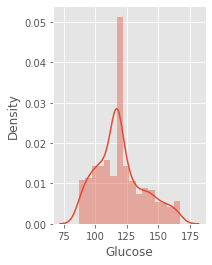

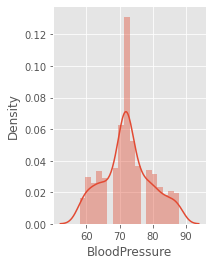

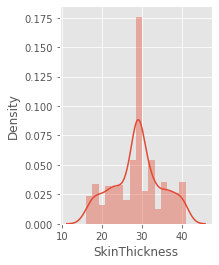

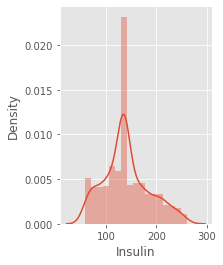

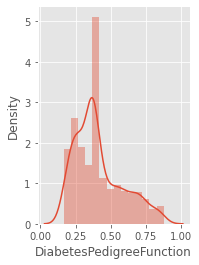

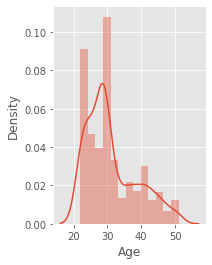

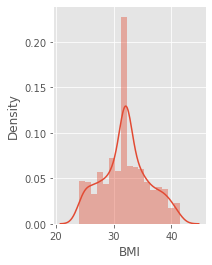

In [ ]:
plot_diagram(df3_out_median)

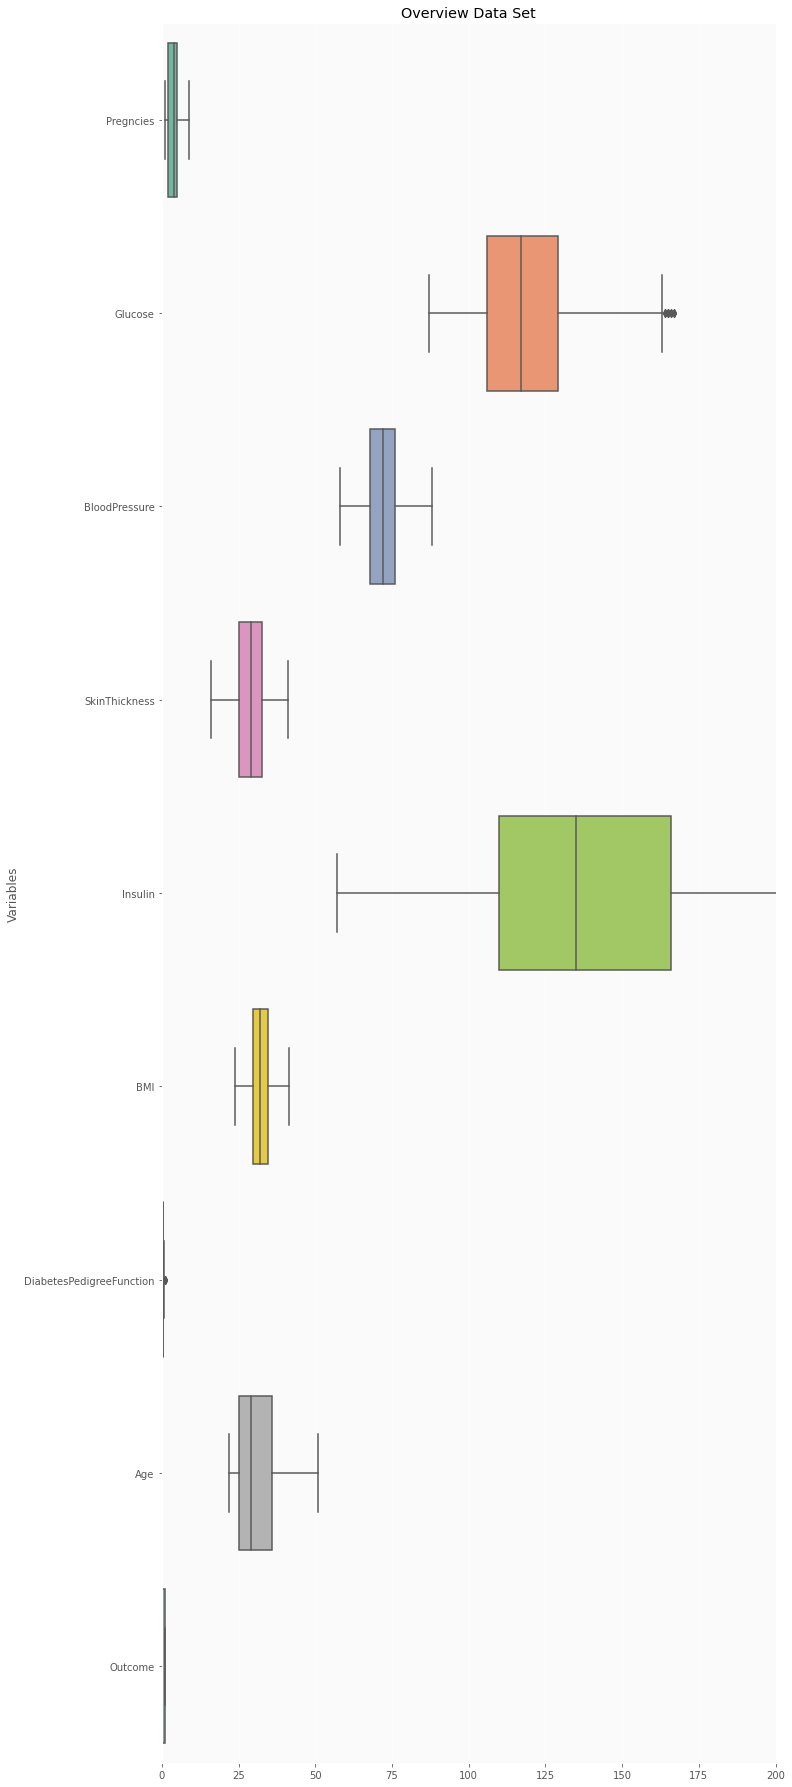

In [ ]:
plot_box_diagram(df3_out_median)

### Z score Method

In [ ]:
df3_out_z = df3.copy()

In [ ]:
def set_median_group_any_outlier_z_score(p,features):
  df = p.copy()
  thres = 3
  for f in features:
    mean = df[f].mean()
    median_0 = df[(df['Outcome'] == 0 )][f].median()
    median_1 = df[(df['Outcome'] == 1 )][f].median()
    std = df[f].std()
    for i in range(len(df[f])):
      z_score = (df[f][i]-mean)/std
      if(df['Outcome'][i]==0):
        if (abs(z_score) > thres):
          df[f][i] = median_0
      else:
        if (abs(z_score) > thres):
          df[f][i] = median_1
      
  return df

In [ ]:
columns

Index(['Pregncies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [ ]:
df3_out_z = set_median_group_any_outlier_z_score(df3_out_z , columns)

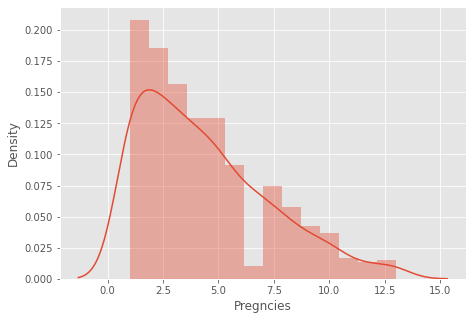

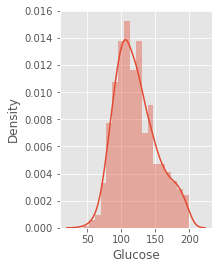

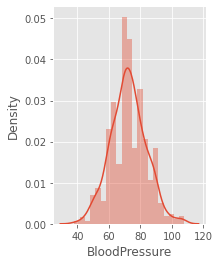

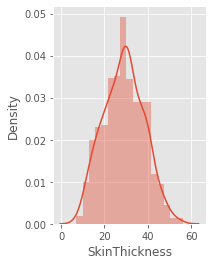

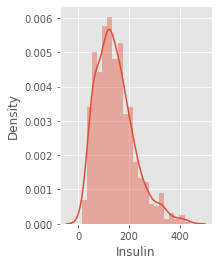

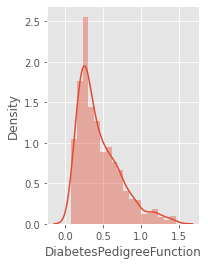

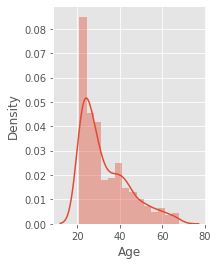

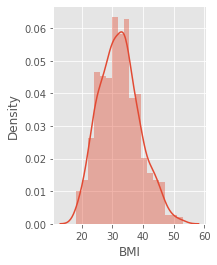

In [ ]:
plot_diagram(df3_out_z)

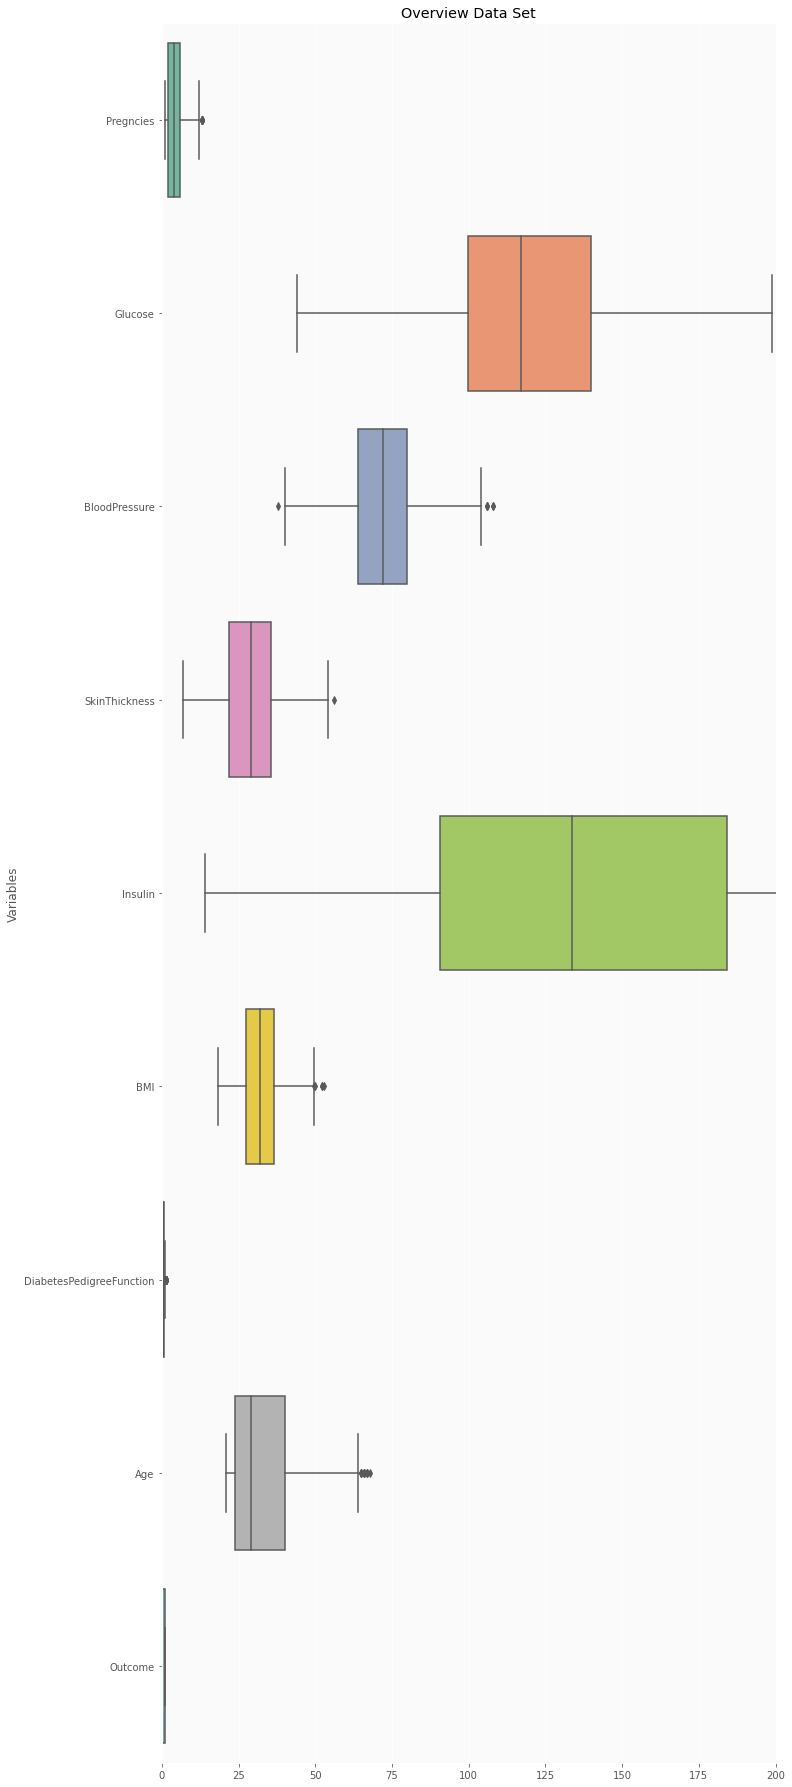

In [ ]:
plot_box_diagram(df3_out_z)

Second attempt

In [ ]:
def set_median_any_outlier_z_score(p,features):
  df = p.copy()
  thres = 3
  for f in features:
    mean = df[f].mean()
    median = df[f].median()
    std = df[f].std()
    for i in range(len(df[f])):
      z_score = (df[f][i]-mean)/std
      if (abs(z_score) > thres):
          df[f][i] = median
      
  return df

In [ ]:
df_out_z_2 = set_median_any_outlier_z_score(df3 , columns)

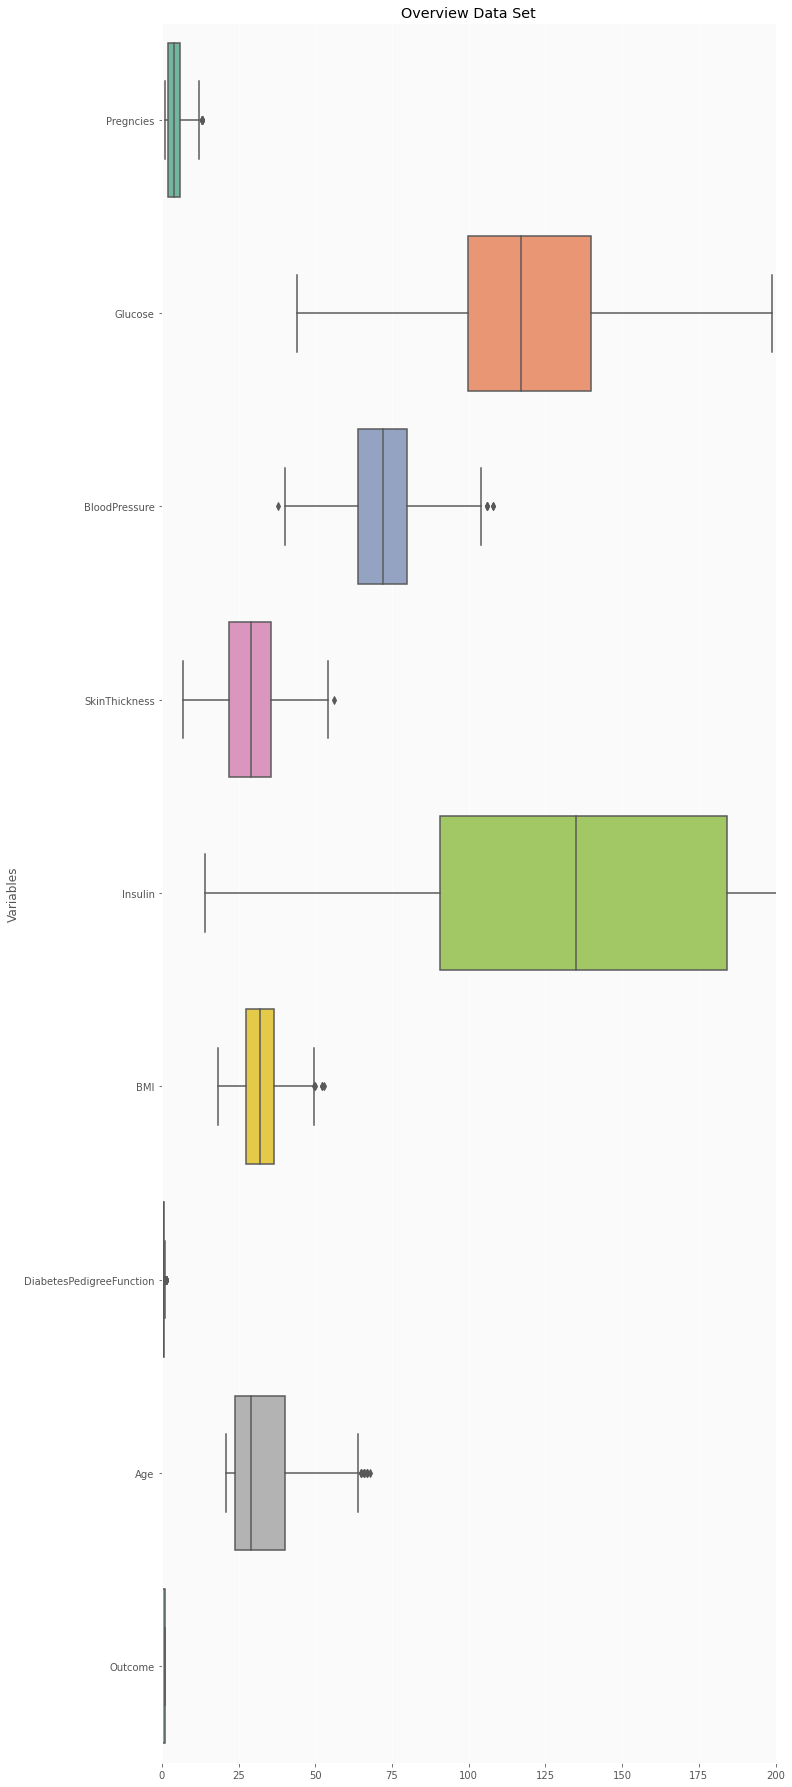

In [ ]:
plot_box_diagram(df_out_z_2)

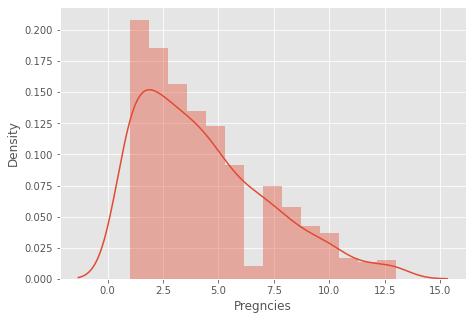

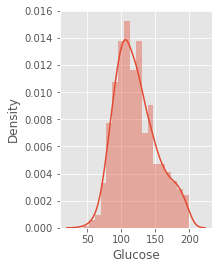

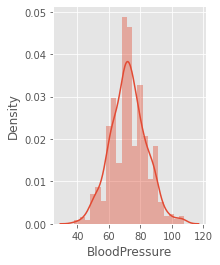

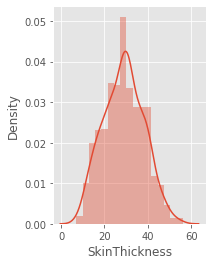

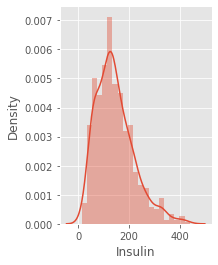

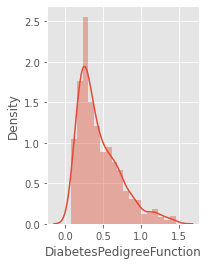

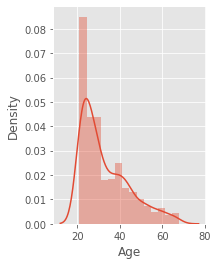

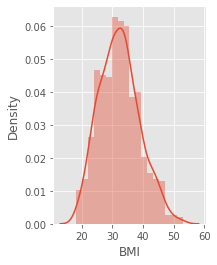

In [ ]:
plot_diagram(df_out_z_2)

Try do better treatment for BloodPressure feature

In [ ]:
unique_values_pressure = list(df3.BloodPressure.unique())
count_unique_pressure = [len(df3[df3['BloodPressure'] == x]) for x in unique_values_pressure]

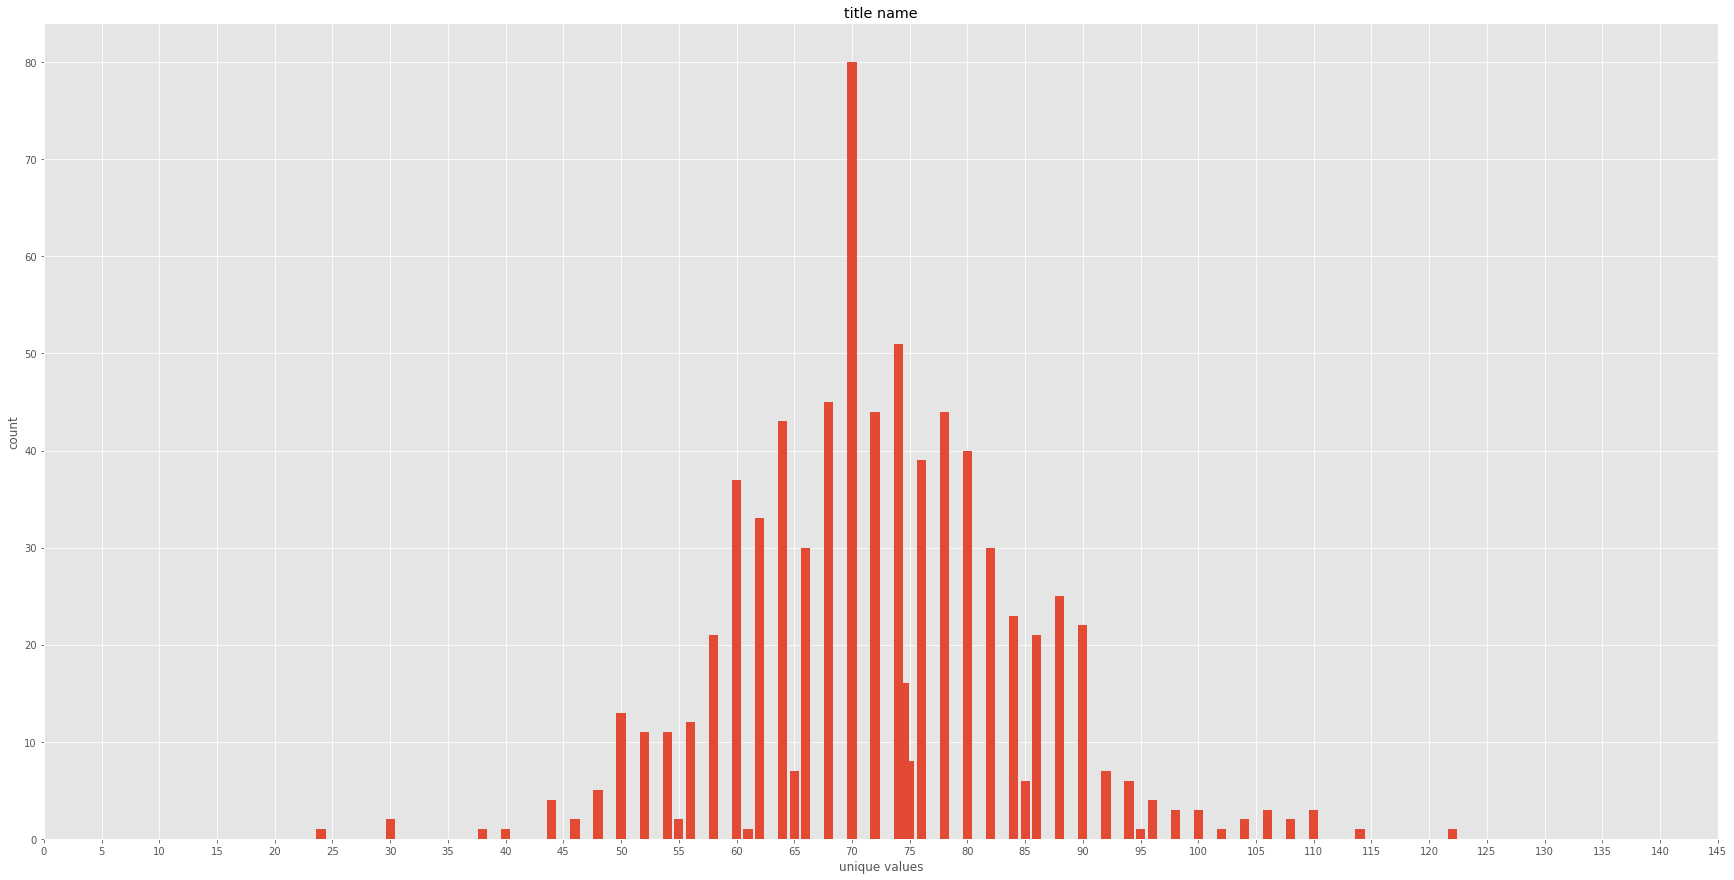

In [ ]:
plt.subplots(figsize=(30, 15))
plt.bar(unique_values_pressure,count_unique_pressure)
x = np.arange(0, 150, 5)
plt.xticks(x)
plt.title('title name')
plt.xlabel('unique values')
plt.ylabel('count')
plt.show()

In [ ]:
# k = 2

Now for DiabetesPedigreeFunction feature

In [ ]:
unique_values_dpfunction = list(df3.DiabetesPedigreeFunction.unique())
count_unique_dpfunction = [len(df3[df3['DiabetesPedigreeFunction'] == x]) for x in unique_values_dpfunction]

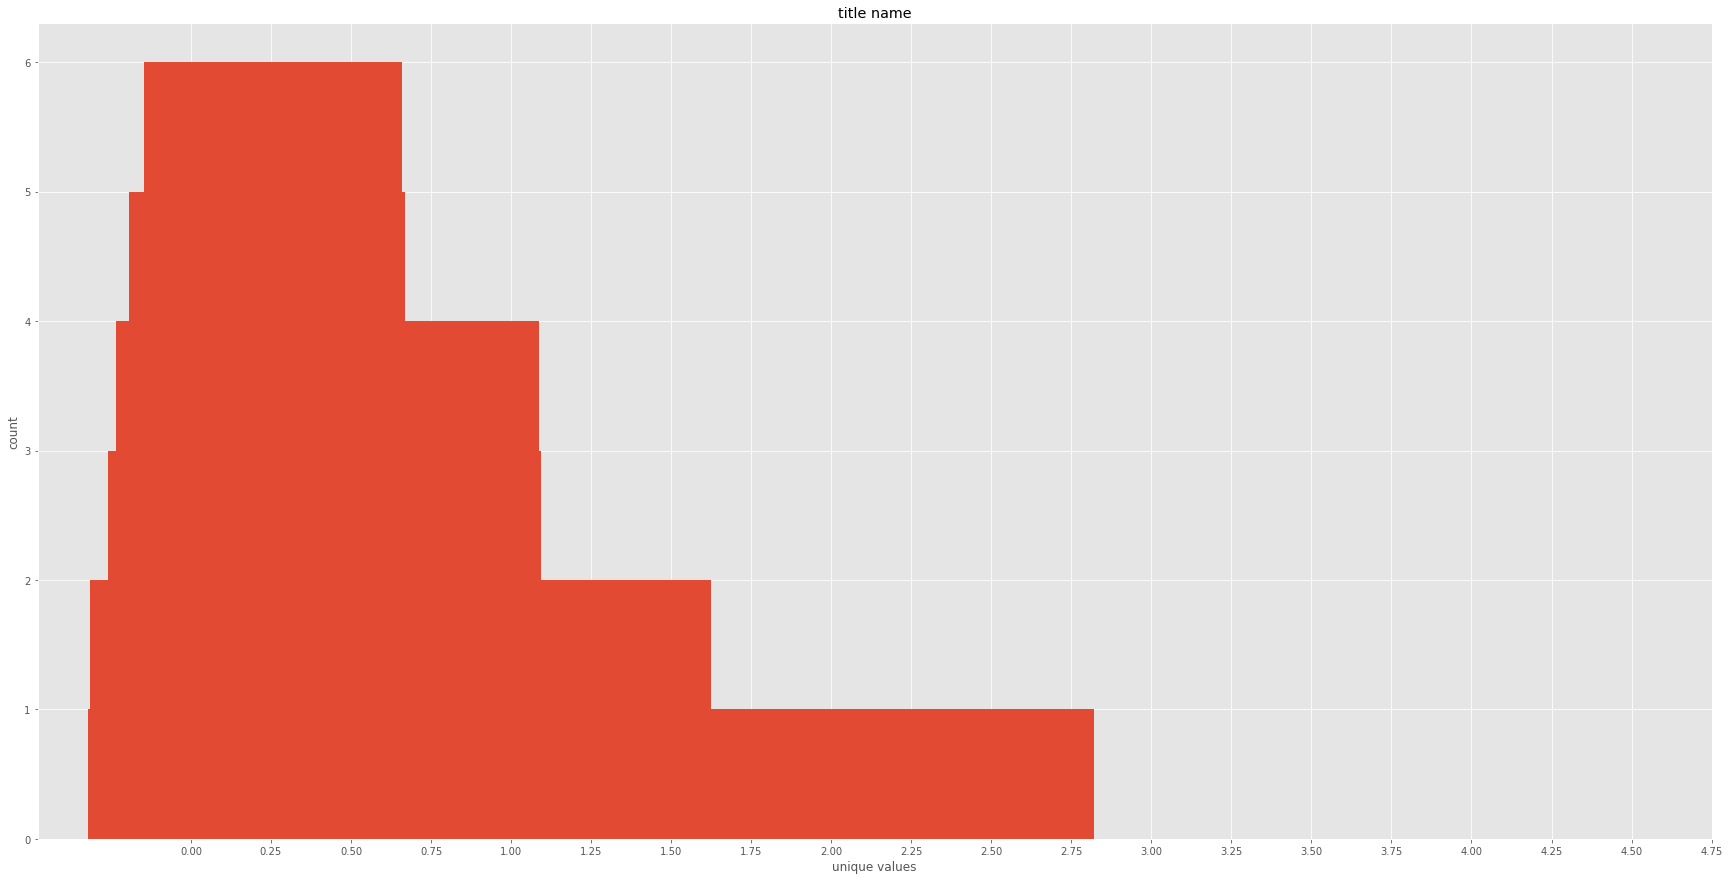

In [ ]:
plt.subplots(figsize=(30, 15))
plt.bar(unique_values_dpfunction,count_unique_dpfunction)
x = np.arange(0, 5, 0.25)
plt.xticks(x)
plt.title('title name')
plt.xlabel('unique values')
plt.ylabel('count')
plt.show()

In [ ]:
# k = 4

In [ ]:
def KNN_impute(p , k , f , i ):
  df = p.copy()
  df[f][i] = np.NaN
  imputer = KNNImputer(n_neighbors=k)
  df_knn = imputer.fit_transform(df)
  df_knn = DataFrame(data = df_knn , columns = df3.columns)
  return df_knn[f][i]
  

def set_median_group_knn_any_outlier_z_score(p , d , feature , k):
  df = d.copy()
  thres = 3
  mean = df[feature].mean()
  median_0 = df[(df['Outcome'] == 0 )][feature].median()
  median_1 = df[(df['Outcome'] == 1 )][feature].median()
  std = df[feature].std()
  for i in range(len(df[feature])):
    z_score1 = (df[feature][i]-mean)/std
    knn_val = KNN_impute(p , k , feature , i)
    z_score2 = (knn_val-mean)/std
    if(df['Outcome'][i]==0):
      if (abs(z_score1) > thres):
        if(abs(z_score2)) <= thres:
          print(knn_val)
          df[feature][i] = knn_val
        else:
          df[feature][i] = median_0
    else:
      if (abs(z_score1) > thres):
        if(abs(z_score2)) <= thres:
          print(knn_val)
          df[feature][i] = knn_val
        else:
          df[feature][i] = median_1
      
  return df


IndentationError: ignored

In [ ]:
columns

Index(['Pregncies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [ ]:
columns_part = list(columns.copy())
columns_part.remove('DiabetesPedigreeFunction')
df_2 = set_median_group_any_outlier_z_score(df3 , columns_part)
#columns_part
df_out_func = set_median_group_knn_any_outlier_z_score(df3 , df3 , 'DiabetesPedigreeFunction' , 4 )

0.60625
0.40375
0.63775
0.5535
0.424
0.5377500000000001
0.38825
0.3955
0.5680000000000001
0.381
0.3455


In [ ]:
df_out_func

,Pregncies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000000,148.0,72.0,35.0,178.833333,33.6,0.627,50.0,1
1,1.000000,85.0,66.0,29.0,60.666667,26.6,0.351,31.0,0
2,8.000000,183.0,64.0,24.0,167.166667,23.3,0.672,32.0,1
3,1.000000,89.0,66.0,23.0,94.000000,28.1,0.167,21.0,0
4,4.818182,137.0,40.0,35.0,168.000000,43.1,0.741,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10.000000,101.0,76.0,48.0,180.000000,32.9,0.171,63.0,0
764,2.000000,122.0,70.0,27.0,163.500000,36.8,0.340,27.0,0
765,5.000000,121.0,72.0,23.0,112.000000,26.2,0.245,30.0,0
766,1.000000,126.0,60.0,33.5,135.166667,30.1,0.349,47.0,1


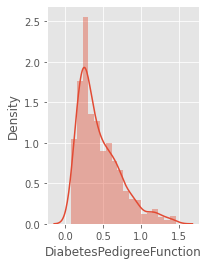

In [ ]:
plt.subplot(1,2,2)
sns.distplot(df_out_func['DiabetesPedigreeFunction'])
plt.show()

In [ ]:
plt.subplot(1,2,2)
sns.distplot(df_out_func['BloodPressure'])
plt.show()

In [ ]:
columns_part = list(columns.copy())
columns_part.remove('BloodPressure')
df_3 = set_median_group_any_outlier_z_score(df3 , columns_part)
#columns_part
df_out_pres = set_median_group_knn_any_outlier_z_score(df3 , df3 , 'BloodPressure' , 4 )

76.5
87.75
61.0
67.25
78.5
83.125
70.5
76.0


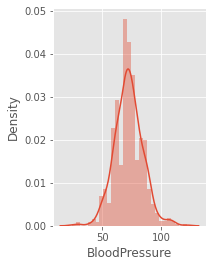

In [ ]:
plt.subplot(1,2,2)
sns.distplot(df_out_func['BloodPressure'])
plt.show()

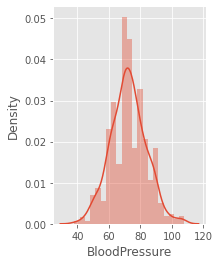

In [ ]:

plt.subplot(1,2,2)
sns.distplot(df3_out_z['BloodPressure'])
plt.show()